## Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import random # to generate random values for (age)

import matplotlib.pyplot as plt
import seaborn as sns

#display all comumns of the dataframe
#pd.options.display.max_columns = None

## Load Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = "/content/drive/MyDrive/Level6/Big Data/diabetic_data.csv"

In [ ]:
df = pd.read_csv(data)

In [ ]:
#display first 10 of the dataset
df.head(10)

encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         1                    2   
6                  3                         1                    2   
7                  1                         1                    7   
8                  2                         1                    4   
9                  3                         3                    4   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   
5                 3  ...          No  Steady                   No   
6                 4  ...          No  Steady                   No   
7                 5  ...          No      No                   No   
8                13  ...          No  Steady                   No   
9                12  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   
5                   No                        No                       No   
6                   No                        No                       No   
7                   No                        No                       No   
8                   No                        No                       No   
9                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  
5                      No      No         Yes        >30  
6                      No      Ch         Yes         NO  
7                      No      No         Yes        >30  
8                      No      Ch         Yes         NO  
9                      No      Ch         Yes         NO  

[10 rows x 50 columns]

In [ ]:
#printing the rows and columns no from the dataset
print("The data has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The data has 101766 rows and 50 columns.


In [ ]:
# Checking datatype and null count of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
print('According to the data there are total {} columns.'.format(df.shape[1]))
#Total categoircal column
df_categorical = df.select_dtypes(include = np.object)
df_numerical = df.select_dtypes(include = np.number)

print('Total categorical columns: ', len(df_categorical.columns))
print('\n')
print('Caterogical column names: ', df_categorical.columns)
print('\n')
print('Total numerical values: ', len(df_numerical.columns))
print('\n')
print('Numercial column names: ', df_numerical.columns)

According to the data there are total 50 columns.
Total categorical columns:  37


Caterogical column names:  Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


Total numerical values:  13


Numercial column names:  Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medi

<ipython-input-16-26b7b1259c3e>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical = df.select_dtypes(include = np.object)


In [ ]:
#checking whether it contain null value or not
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

## Imputed Weight

In [ ]:
race_counts = df['race'].value_counts()# showing the types of race in dataset under race row
print(race_counts)

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [ ]:
age_counts = df['age'].value_counts()#Age counts on range
print(age_counts)

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [ ]:
diabetesmed_counts  = df['diabetesMed'].value_counts()
print(diabetesmed_counts )

Yes    78363
No     23403
Name: diabetesMed, dtype: int64


#### Let's check, if there are any special character i.e. ? in the data or not

In [ ]:
for i in df.columns:
  if df[i].dtype == object:
    print(i, df[i][df[i] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
weight_counts = df['weight'][df['weight'] == '?'].count()
total_rows = (df.shape[0])
weight_in_per = (weight_counts/ total_rows)* 100
weight_in_per

96.85847925633315

In [ ]:
payer_code_counts = df['payer_code'][df['payer_code'] == '?'].count()
total_rows = (df.shape[0])
payer_code_in_per = (payer_code_counts/ total_rows)* 100
payer_code_in_per

39.5574160328597

In [ ]:
med_sp_counts = df['medical_specialty'].value_counts()# showing the types of race in dataset under race row
print(med_sp_counts)

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64


In [ ]:
med_sp_counts = df['medical_specialty'][df['medical_specialty'] == '?'].count()
total_rows = (df.shape[0])
med_sp_per = (med_sp_counts/ total_rows)* 100
med_sp_per

49.08220820313268


1.   In this dataset missing values are represented as '?' sign
2.   weight has 96.85% of the missing values so there is no significance in filling  missing value so we should drop this variable
3.  payer_code has 39.55% missing values that means we can drop tis column
4.  medical_speciality has 49.08% missing values that means we can drop this column too






In [ ]:
for column in df:
    missing_counts = df[column][df[column] == '?'].count()
    total_rows = df.shape[0]
    missing_percentage = (missing_counts / total_rows) * 100
    print(f"Missing percentage for '{column}': {missing_percentage:.2f}%")

Missing percentage for 'encounter_id': 0.00%
Missing percentage for 'patient_nbr': 0.00%
Missing percentage for 'race': 2.23%
Missing percentage for 'gender': 0.00%
Missing percentage for 'age': 0.00%
Missing percentage for 'weight': 96.86%
Missing percentage for 'admission_type_id': 0.00%
Missing percentage for 'discharge_disposition_id': 0.00%
Missing percentage for 'admission_source_id': 0.00%
Missing percentage for 'time_in_hospital': 0.00%
Missing percentage for 'payer_code': 39.56%
Missing percentage for 'medical_specialty': 49.08%
Missing percentage for 'num_lab_procedures': 0.00%
Missing percentage for 'num_procedures': 0.00%
Missing percentage for 'num_medications': 0.00%
Missing percentage for 'number_outpatient': 0.00%
Missing percentage for 'number_emergency': 0.00%
Missing percentage for 'number_inpatient': 0.00%
Missing percentage for 'diag_1': 0.02%
Missing percentage for 'diag_2': 0.35%
Missing percentage for 'diag_3': 1.40%
Missing percentage for 'number_diagnoses': 0.

## Data Cleaning


In [ ]:
#dropping columns with large number of missing values
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [ ]:
#displaying the statstical overiview of the data
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

### Drop Patient IDs

In [ ]:
df['encounter_id'].nunique() #101766 is the total rows too

101766

In [ ]:
df['patient_nbr'].nunique()

71518

The hospital provides different unique encounter_id and patient_nbr to identify the patient.
These IDs are just identities and are not useful values so they can be dropped for our future analysis

In [ ]:
#dropping not useful varibales
df.drop(['encounter_id', 'patient_nbr'], axis = 1, inplace = True)

In [ ]:
race_counts = df['race'].value_counts()# showing the types of race in dataset under race row
print(race_counts)

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


There are some unknown values in the form of '?' which we can replace with NAN values so that later thses vlaues can be filled

In [ ]:
df['race'] = df['race'].replace('?', np.nan)
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [ ]:
#Replacing nan values with mode
df['race'] = df['race'].fillna(df['race'].mode()[0])
df['race'].value_counts()

Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [ ]:
gender_counts = df['gender'].value_counts() #using .value counts to count the no of attributes in them
print(gender_counts)

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


The third category is of unknown/ invalid which are the missing values anf the count is very less so they can be dropped

In [ ]:
df['gender'] = df['gender'].replace('Unknown/Invalid', np.nan)
df['gender'].dropna(inplace = True)

In [ ]:
df['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

In [ ]:
df['gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['gender'].value_counts()

Female    54711
Male      47055
Name: gender, dtype: int64

#### Replace all '?' values

In [ ]:
df.replace('?', np.nan, inplace = True)

In [ ]:
df.isnull().sum()

race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [ ]:
df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])
df['diag_1'].value_counts()

428    6883
414    6581
786    4016
410    3614
486    3508
       ... 
817       1
61        1
148       1
870       1
V51       1
Name: diag_1, Length: 716, dtype: int64

In [ ]:
df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])
df['diag_2'].value_counts()

276     7110
428     6662
250     6071
427     5036
401     3736
        ... 
232        1
908        1
52         1
E817       1
927        1
Name: diag_2, Length: 748, dtype: int64

In [ ]:
df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])
df['diag_3'].value_counts()

250     12978
401      8289
276      5175
428      4577
427      3955
        ...  
657         1
684         1
603         1
E826        1
971         1
Name: diag_3, Length: 789, dtype: int64

#### Converting Categorical Values in Numerical

In [ ]:
age_counts = df['age'].value_counts()#Age counts on range
print(age_counts)

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64




1.   It shows the range of age between 0-100
2.   From the above data we can say that most of the population come under the age of [50-60) [80-90)
3.   The dataset only gives the age as 10 year intervals, so we don't know the exact age of each patient.



In [ ]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [ ]:
def generate_age_from_range(age_range_str):
    #remove brackets from the age range string
    age_range_str = age_range_str.replace('[', '').replace(')', '')

    #convert the age range string to a tuple of integers
    age_range = tuple(map(int, age_range_str.split('-')))

    #generate a random age between the two numbers in the age range
    generated_age = random.randint(age_range[0], age_range[1])

    return generated_age

In [ ]:
# apply the function to the 'age_range' column to generate a new 'age' column
df['age'] = df['age'].apply(generate_age_from_range)

In [ ]:
age_counts = df['age'].value_counts()
print(age_counts)

70    4414
80    3952
60    3635
50    2455
71    2434
      ... 
4       14
6       12
8       11
2       11
1        8
Name: age, Length: 101, dtype: int64


In [ ]:
admi_type_id_counts = df['admission_type_id'].value_counts()
print(admi_type_id_counts)

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


## Importing ID's Mapping CSV

Source: https://data.world/uci/diabetes-130-us-hospitals-for-years-1999-2008/workspace/file?filename=dataset_diabetes%2FIDs_mapping.csv

In [ ]:
id_mapping_csv = "/content/drive/MyDrive/Level6/Big Data/IDs_mapping.csv" #Dhiraj
#id_mapping_csv="/content/drive/MyDrive/Bigdata/IDs_mapping.csv"#Madan Khanal

In [ ]:
id_map = pd.read_csv(id_mapping_csv)

In [ ]:
#display all rows of the dataframe
#pd.options.display.max_rows = None

#display data of the dataset
id_map

admission_type_id                                        description
0                  1                                          Emergency
1                  2                                             Urgent
2                  3                                           Elective
3                  4                                            Newborn
4                  5                                      Not Available
..               ...                                                ...
62                22   Transfer from hospital inpt/same fac reslt in...
63                23                          Born inside this hospital
64                24                         Born outside this hospital
65                25            Transfer from Ambulatory Surgery Center
66                26                              Transfer from Hospice

[67 rows x 2 columns]

In [ ]:
#printing the rows and columns no from the dataset
print("The data has {} rows and {} columns.".format(id_map.shape[0], id_map.shape[1]))

The data has 67 rows and 2 columns.


In [ ]:
id_map.head(8)

admission_type_id    description
0                 1      Emergency
1                 2         Urgent
2                 3       Elective
3                 4        Newborn
4                 5  Not Available
5                 6            NaN
6                 7  Trauma Center
7                 8     Not Mapped

In [ ]:
id_map.loc[:, ['admission_type_id', 'description']].head(8)

admission_type_id    description
0                 1      Emergency
1                 2         Urgent
2                 3       Elective
3                 4        Newborn
4                 5  Not Available
5                 6            NaN
6                 7  Trauma Center
7                 8     Not Mapped

#### According to ID's Mapping
#### admission_type_id: Description

A. There are 8 vlaues correspond to:

1.   Emergency
2.   Urgent
3.   Elective
4.   Newborn
5.   Not Available
6.   NULL
7.   Trauma Center
8.   Not Mapped

B . Outcome


1.   From this description we can see that majority of the patient that have been addmitted in this hospital have an admission type as emergency.
2.   For furhter analysis we can merge these categiories into less number of categories
3.   Emergency/ Urgent/ Trauma Center to Emergency
4.   Not Available/ Null/ Not Mapped to Not Available
5.   Elective &  New Born remain same






In [ ]:
df['admission_type_id'] = df['admission_type_id'].replace({1:'Emergency', 2:'Emergency', 7:'Emergency',
                                                             5:'Not Available', 6:'Not Available', 8:'Not Available',
                                                             3:'Elective',
                                                             4:'Newborn'
                                                             })

In [ ]:
df['admission_type_id'].value_counts()

Emergency        72491
Elective         18869
Not Available    10396
Newborn             10
Name: admission_type_id, dtype: int64

In [ ]:
df[df.loc[:,'admission_type_id'] == 'Newborn']

race  gender  age admission_type_id  \
2043          Caucasian    Male   56           Newborn   
2203          Caucasian    Male   89           Newborn   
2461    AfricanAmerican    Male   78           Newborn   
4823          Caucasian  Female   68           Newborn   
35877   AfricanAmerican    Male   69           Newborn   
47548          Hispanic    Male   46           Newborn   
48711         Caucasian  Female   76           Newborn   
80354          Hispanic  Female    4           Newborn   
87714         Caucasian    Male   66           Newborn   
100721            Asian    Male   89           Newborn   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
2043                           1                    4                 2   
2203                           1                    4                 2   
2461                           6                    4                 5   
4823                           6                    4                 2   
35877                          1                   14                 3   
47548                          1                    7                 6   
48711                          6                    1                 4   
80354                          1                    1                 2   
87714                          1                    4                 3   
100721                         6                    7                 3   

        num_lab_procedures  num_procedures  num_medications  ...  citoglipton  \
2043                    56               2               13  ...           No   
2203                    46               6               14  ...           No   
2461                    73               1               12  ...           No   
4823                    39               0                7  ...           No   
35877                   66               0               18  ...           No   
47548                   39               4                7  ...           No   
48711                   37               1               18  ...           No   
80354                   27               0                2  ...           No   
87714                   28               0               15  ...           No   
100721                  51               0               10  ...           No   

        insulin  glyburide-metformin glipizide-metformin  \
2043     Steady                   No                  No   
2203     Steady                   No                  No   
2461         Up                   No                  No   
4823     Steady                   No                  No   
35877    Steady                   No                  No   
47548        No                   No                  No   
48711        No                   No                  No   
80354        No                   No                  No   
87714    Steady               Steady                  No   
100721       No                   No                  No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
2043                         No                      No   
2203                         No                      No   
2461                         No                      No   
4823                         No                      No   
35877                        No                      No   
47548                        No                      No   
48711                        No                      No   
80354                        No                      No   
87714                        No                      No   
100721                       No                      No   

        metformin-pioglitazone change diabetesMed readmitted  
2043                        No     No         Yes         NO  
2203                        No     No         Yes        >30  
2461                        No     Ch         Yes         NO  
4823                        No     No         Yes        <30  
35877                       No     N

From the above we can clearly see that the Newborn category, as the age column is not providing correct information

In [ ]:
df.drop(df.index[df['admission_type_id'] == 'Newborn'], inplace = True)

In [ ]:
df['admission_type_id'].value_counts()

Emergency        72491
Elective         18869
Not Available    10396
Name: admission_type_id, dtype: int64

discharge_disposition_id: Description

In [ ]:
df['discharge_disposition_id'].value_counts()

1     60228
3     13954
6     12898
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [ ]:
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

## According to ID's Mapping
discahrge_disposition_id: Description

In [ ]:
id_map.iloc[9:41]  # Rows from index 9 to 41 (inclusive)

admission_type_id  \
9   discharge_disposition_id   
10                         1   
11                         2   
12                         3   
13                         4   
14                         5   
15                         6   
16                         7   
17                         8   
18                         9   
19                        10   
20                        11   
21                        12   
22                        13   
23                        14   
24                        15   
25                        16   
26                        17   
27                        18   
28                        19   
29                        20   
30                        21   
31                        22   
32                        23   
33                        24   
34                        25   
35                        26   
36                        30   
37                        27   
38                        28   
39                        29   
40                       NaN   

                                          description  
9                                         description  
10                                 Discharged to home  
11  Discharged/transferred to another short term h...  
12                      Discharged/transferred to SNF  
13                      Discharged/transferred to ICF  
14  Discharged/transferred to another type of inpa...  
15  Discharged/transferred to home with home healt...  
16                                           Left AMA  
17  Discharged/transferred to home under care of H...  
18          Admitted as an inpatient to this hospital  
19  Neonate discharged to another hospital for neo...  
20                                            Expired  
21  Still patient or expected to return for outpat...  
22                                     Hospice / home  
23                         Hospice / medical facility  
24  Discharged/transferred within this institution...  
25  Discharged/transferred/referred another instit...  
26  Discharged/transferred/referred to this instit...  
27                                                NaN  
28           Expired at home. Medicaid only, hospice.  
29  Expired in a medical facility. Medicaid only, ...  
30    Expired, place unknown. Medicaid only, hospice.  
31  Discharged/transferred to another rehab fac in...  
32  Discharged/transferred to a long term care hos...  
33  Discharged/transferred to a nursing facility c...  
34                                         Not Mapped  
35                                    Unknown/Invalid  
36  Discharged/transferred to another Type of Heal...  
37  Discharged/transferred to a federal health car...  
38  Discharged/transferred/referred to a psychiatr...  
39  Discharged/transferred to a Critical Access Ho...  
40                                                NaN

### We are merging several categories of discarge_disposition_id into fewer categories


1.   1, 6, 8 - Discharged to home
2.   2, 3, 4, 5, 16, 22, 23, 24, 27, 28, 29, 30 - Transferred to another faculty
3.   9, 12, 15, 17 - Still patient/ referred to this institution
4.   7 - Left AMA (Against Medical Advice)
5.   10 - Neonate discharged
6.   11, 19, 20, 21 - Expired
7.   13, 14 - Hospice
8.   18, 25, 26 - Not available

In [ ]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace({1: 'Discharged to home', 6: 'Discharged to home', 8: 'Discharged to home',
                                                                         2: 'Transferred to another facility',
                                                                         3: 'Transferred to another facility',
                                                                         4: 'Transferred to another facility',
                                                                         5: 'Transferred to another facility',
                                                                         16: 'Transferred to another facility',
                                                                         22: 'Transferred to another facility',
                                                                         23: 'Transferred to another facility',
                                                                         24: 'Transferred to another facility',
                                                                         27: 'Transferred to another facility',
                                                                         28: 'Transferred to another facility',
                                                                         29: 'Transferred to another facility',
                                                                         30: 'Transferred to another facility',
                                                                         7:  'Left AMA',
                                                                         9:  'Still patient/referred to this institution',
                                                                         12: 'Still patient/referred to this institution',
                                                                         15: 'Still patient/referred to this institution',
                                                                         17: 'Still patient/referred to this institution',
                                                                         10: 'Neonate discharged',
                                                                         11: 'Expired',
                                                                         19: 'Expired',
                                                                         20: 'Expired',
                                                                         21: 'Expired',
                                                                         13: 'Hospice',
                                                                         14: 'Hospice',
                                                                         18: 'Not Available',
                                                                         25: 'Not Available',
                                                                         26: 'Not Available'
                                                                         })

In [ ]:
df['discharge_disposition_id'].value_counts() #What is Left AMA

Discharged to home                            73234
Transferred to another facility               20689
Not Available                                  4680
Expired                                        1652
Hospice                                         771
Left AMA                                        623
Still patient/referred to this institution      101
Neonate discharged                                6
Name: discharge_disposition_id, dtype: int64

The patients who have expired, Neoate(newborn child) and the ones who are terminally ill (hospcie) should be removed from the column because they will create bias as they will not be readmitted

In [ ]:
df = df[df['discharge_disposition_id']!= 'Expired']
df = df[df['discharge_disposition_id']!= 'Neonate discharged']
df = df[df['discharge_disposition_id']!= 'Hospice']

In [ ]:
df['discharge_disposition_id'].value_counts()

Discharged to home                            73234
Transferred to another facility               20689
Not Available                                  4680
Left AMA                                        623
Still patient/referred to this institution      101
Name: discharge_disposition_id, dtype: int64

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df['admission_source_id'].value_counts()

7     55845
1     29163
17     6570
4      3113
6      2239
2      1081
5       806
3       185
20      159
9       125
8        15
22       12
10        8
11        2
25        2
14        1
13        1
Name: admission_source_id, dtype: int64

In [ ]:
df['admission_source_id'].nunique()

17

## According to ID's Mapping
admission_source_id: Description

In [ ]:
id_map.iloc[41:]

admission_type_id                                        description
41  admission_source_id                                        description
42                    1                                 Physician Referral
43                    2                                    Clinic Referral
44                    3                                       HMO Referral
45                    4                           Transfer from a hospital
46                    5     Transfer from a Skilled Nursing Facility (SNF)
47                    6         Transfer from another health care facility
48                    7                                     Emergency Room
49                    8                              Court/Law Enforcement
50                    9                                      Not Available
51                   10              Transfer from critial access hospital
52                   11                                    Normal Delivery
53                   12                                 Premature Delivery
54                   13                                          Sick Baby
55                   14                                   Extramural Birth
56                   15                                      Not Available
57                   17                                                NaN
58                   18           Transfer From Another Home Health Agency
59                   19             Readmission to Same Home Health Agency
60                   20                                         Not Mapped
61                   21                                    Unknown/Invalid
62                   22   Transfer from hospital inpt/same fac reslt in...
63                   23                          Born inside this hospital
64                   24                         Born outside this hospital
65                   25            Transfer from Ambulatory Surgery Center
66                   26                              Transfer from Hospice

### We are merging several categories of admission_source_id into fewer categories


1.   1, 2, 3 - Referral
2.   4, 5, 6, 10, 18, 19, 22, 25, 26, - Transferred from hospital (another care facility)
3.   7,8 - Emergency
4.   9, 15, 17, 20, 21 - Not Available
5.   11, 12, 13, 14, 23, 24 - Delivery

In [ ]:
df['admission_source_id'] = df['admission_source_id'].replace({1:'Referral',2:'Referral', 3:'Referral',
                                                               4:'Transferred from hospital',5: 'Transferred from hospital',6: 'Transferred from hospital',
                                                               10: 'Transferred from hospital', 18: 'Transferred from hospital', 19: 'Transferred from hospital',
                                                               25: 'Transferred from hospital', 26: 'Transferred from hospital', 22: 'Transferred from hospital',
                                                               7:'Emergency' ,8: 'Emergency',
                                                               9: 'Not Available', 15: 'Not Available', 17: 'Not Available', 20: 'Not Available', 21:'Not Available',
                                                               11: 'Delivery', 12: 'Delivery', 13: 'Delivery', 14: 'Delivery', 23: 'Delivery' , 24: 'Delivery'
                                                               })

In [ ]:
df['admission_source_id'].value_counts()

Emergency                    55860
Referral                     30429
Not Available                 6854
Transferred from hospital     6180
Delivery                         4
Name: admission_source_id, dtype: int64

Dropping the cateogory delivery because the admission_source_id == delivery and the age corresponding to it give contradictory information.

In [ ]:
df = df[df['admission_source_id'] != 'Delivery']

In [ ]:
df['admission_source_id'].value_counts()

Emergency                    55860
Referral                     30429
Not Available                 6854
Transferred from hospital     6180
Name: admission_source_id, dtype: int64

In [ ]:
#Time in hospital ranges from 1 day ot 14 days
df['time_in_hospital'].value_counts(sort=False)

1     13824
3     17425
2     16886
4     13682
5      9747
13     1152
12     1383
9      2878
7      5696
10     2262
6      7354
11     1770
8      4269
14      995
Name: time_in_hospital, dtype: int64

In [ ]:
df['num_lab_procedures'].unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  66,  36,  19,  64,  25,  53,
        52,  87,  27,  37,  28,  48,  10,   2,  65,  67,  40,  54,  58,
        57,  43,  32,  83,  34,  39,  69,  38,  72,  22,  96,  46,  78,
        56,  61,  88,  50,   1,  18,  82,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,   5,  95,  97,  84,  14,  74, 105,  86,  98,
        20,   6,  94,   8, 102,   7,  89,  91,  92,   4, 101,  99, 100,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118])

In [ ]:
print('The number of lab tests a patient has undergone can range from', df.num_lab_procedures.min(),'to', df.num_lab_procedures.max())

The number of lab tests a patient has undergone can range from 1 to 132


In [ ]:
df.num_procedures.value_counts()

0    45672
1    20247
2    12367
3     9202
6     4799
4     4048
5     2988
Name: num_procedures, dtype: int64

In [ ]:
print('The number of medications range forma minimum of',df.num_medications.min(),'to', df.num_medications.max())

The number of medications range forma minimum of 1 to 81




1.   number_outpatient: Number of outpatient visits who typically returning home the same day of the patient in the year preceding the eocunter
2.   number_emergency: Number of emergency visits of the patient in the year preceding the eocunter
3.   number_inpatient: Number of inpatient visits of the patient in the year preceding the eocunter


In [ ]:
df['number_outpatient'].value_counts()

0     82976
1      8348
2      3509
3      1996
4      1077
5       514
6       294
7       154
8        96
9        82
10       57
11       41
13       30
12       29
14       28
15       20
16       13
17        8
21        6
20        6
18        5
22        5
19        3
27        3
24        3
26        2
23        2
33        2
35        2
36        2
29        2
39        1
34        1
42        1
25        1
28        1
37        1
38        1
40        1
Name: number_outpatient, dtype: int64

In [ ]:
df['number_emergency'].value_counts()

0     88229
1      7474
2      1984
3       706
4       369
5       190
6        93
7        72
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: number_emergency, dtype: int64

In [ ]:
df['number_inpatient'].value_counts()

0     66230
1     18980
2      7299
3      3271
4      1574
5       791
6       474
7       262
8       145
9       109
10       59
11       49
12       32
13       18
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: number_inpatient, dtype: int64

The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization. The idea was to see which version gives us better results. Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage. so we combined these features into a new variable called Service utilization

In [ ]:
#One year visit
df['service_utilization'] = df['number_outpatient'] + df['number_inpatient'] + df['number_emergency']

<ipython-input-85-976784555f8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service_utilization'] = df['number_outpatient'] + df['number_inpatient'] + df['number_emergency']


In [ ]:
df.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization'],
      dtype='object')

In [ ]:
df.head()

race  gender  age admission_type_id discharge_disposition_id  \
0        Caucasian  Female    7     Not Available            Not Available   
1        Caucasian  Female   17         Emergency       Discharged to home   
2  AfricanAmerican  Female   20         Emergency       Discharged to home   
3        Caucasian    Male   37         Emergency       Discharged to home   
4        Caucasian    Male   42         Emergency       Discharged to home   

  admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0            Referral                 1                  41               0   
1           Emergency                 3                  59               0   
2           Emergency                 2                  11               5   
3           Emergency                 2                  44               1   
4           Emergency                 1                  51               0   

   num_medications  ... insulin glyburide-metformin glipizide-metformin  \
0                1  ...      No                  No                  No   
1               18  ...      Up                  No                  No   
2               13  ...      No                  No                  No   
3               16  ...      Up                  No                  No   
4                8  ...  Steady                  No                  No   

   glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone  \
0                        No                      No                     No   
1                        No                      No                     No   
2                        No                      No                     No   
3                        No                      No                     No   
4                        No                      No                     No   

  change diabetesMed readmitted service_utilization  
0     No          No         NO                   0  
1     Ch         Yes        >30                   0  
2     No         Yes         NO                   3  
3     Ch         Yes         NO                   0  
4     Ch         Yes         NO                   0  

[5 rows x 43 columns]

In [ ]:
df['diag_1'].nunique()

714

In [ ]:
df['diag_2'].nunique()

747

In [ ]:
df['diag_3'].nunique()

786


1.   Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 714 distinct values
2.   Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 747 distinct values
3.   Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 786 distinct values


They are coded in ICD-9 code (https://en.wikipedia.org/wiki/List_of_ICD-9_codes), resulting in hundreds of distinct categories. One way to simplify this, is by grouping every ICD-9 code value into one of 18 generic health problems, depending on the first 3 digits as following:



The following is a list of codes for International Statistical Classification of Diseases and Related Health Problems.[1][2]

* List of ICD-9 codes 001–139: infectious and parasitic diseases
* List of ICD-9 codes 140–239: neoplasms
* List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
* List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs
* List of ICD-9 codes 290–319: mental disorders
* List of ICD-9 codes 320–389: diseases of the nervous system and sense organs
* List of ICD-9 codes 390–459: diseases of the circulatory system
* List of ICD-9 codes 460–519: diseases of the respiratory system
* List of ICD-9 codes 520–579: diseases of the digestive system
* List of ICD-9 codes 580–629: diseases of the genitourinary system
* List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium
* List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue
* List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue
* List of ICD-9 codes 740–759: congenital anomalies
* List of ICD-9 codes 760–779: certain conditions originating in the perinatal period
* List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions
* List of ICD-9 codes 800–999: injury and poisoning
* List of ICD-9 codes E and V codes: external causes of injury and supplemental classification  





In [ ]:
#start by setting all values containing E or V into 0 (as one category)
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0

df.loc[df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0

df.loc[df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0


In [ ]:
#setting all missing values into -1
df['diag_1'] = df['diag_1'].replace('?', -1)
df['diag_2'] = df['diag_2'].replace('?', -1)
df['diag_3'] = df['diag_3'].replace('?', -1)

In [ ]:
#No all diag values can be converted into numeric values
df['diag_1'] = df['diag_1'].astype(float)
df['diag_2'] = df['diag_2'].astype(float)
df['diag_3'] = df['diag_3'].astype(float)

In [ ]:
#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
df.loc[(df['diag_1'] >= 1) & (df['diag_1'] < 140), 'diag_1'] = 1
df.loc[(df['diag_1'] >= 140) & (df['diag_1'] < 240), 'diag_1'] = 2
df.loc[(df['diag_1'] >= 240) & (df['diag_1'] < 280), 'diag_1'] = 3
df.loc[(df['diag_1'] >= 280) & (df['diag_1'] < 290), 'diag_1'] = 4
df.loc[(df['diag_1'] >= 290) & (df['diag_1'] < 320), 'diag_1'] = 5
df.loc[(df['diag_1'] >= 320) & (df['diag_1'] < 390), 'diag_1'] = 6
df.loc[(df['diag_1'] >= 390) & (df['diag_1'] < 460), 'diag_1'] = 7
df.loc[(df['diag_1'] >= 460) & (df['diag_1'] < 520), 'diag_1'] = 8
df.loc[(df['diag_1'] >= 520) & (df['diag_1'] < 580), 'diag_1'] = 9
df.loc[(df['diag_1'] >= 580) & (df['diag_1'] < 630), 'diag_1'] = 10
df.loc[(df['diag_1'] >= 630) & (df['diag_1'] < 680), 'diag_1'] = 11
df.loc[(df['diag_1'] >= 680) & (df['diag_1'] < 710), 'diag_1'] = 12
df.loc[(df['diag_1'] >= 710) & (df['diag_1'] < 740), 'diag_1'] = 13
df.loc[(df['diag_1'] >= 740) & (df['diag_1'] < 760), 'diag_1'] = 14
df.loc[(df['diag_1'] >= 760) & (df['diag_1'] < 780), 'diag_1'] = 15
df.loc[(df['diag_1'] >= 780) & (df['diag_1'] < 800), 'diag_1'] = 16
df.loc[(df['diag_1'] >= 800) & (df['diag_1'] < 1000), 'diag_1'] = 17
df.loc[df['diag_1'] == -1, 'diag_1'] = 0

In [ ]:
df.loc[(df['diag_2'] >= 1) & (df['diag_2'] < 140), 'diag_2'] = 1
df.loc[(df['diag_2'] >= 140) & (df['diag_2'] < 240), 'diag_2'] = 2
df.loc[(df['diag_2'] >= 240) & (df['diag_2'] < 280), 'diag_2'] = 3
df.loc[(df['diag_2'] >= 280) & (df['diag_2'] < 290), 'diag_2'] = 4
df.loc[(df['diag_2'] >= 290) & (df['diag_2'] < 320), 'diag_2'] = 5
df.loc[(df['diag_2'] >= 320) & (df['diag_2'] < 390), 'diag_2'] = 6
df.loc[(df['diag_2'] >= 390) & (df['diag_2'] < 460), 'diag_2'] = 7
df.loc[(df['diag_2'] >= 460) & (df['diag_2'] < 520), 'diag_2'] = 8
df.loc[(df['diag_2'] >= 520) & (df['diag_2'] < 580), 'diag_2'] = 9
df.loc[(df['diag_2'] >= 580) & (df['diag_2'] < 630), 'diag_2'] = 10
df.loc[(df['diag_2'] >= 630) & (df['diag_2'] < 680), 'diag_2'] = 11
df.loc[(df['diag_2'] >= 680) & (df['diag_2'] < 710), 'diag_2'] = 12
df.loc[(df['diag_2'] >= 710) & (df['diag_2'] < 740), 'diag_2'] = 13
df.loc[(df['diag_2'] >= 740) & (df['diag_2'] < 760), 'diag_2'] = 14
df.loc[(df['diag_2'] >= 760) & (df['diag_2'] < 780), 'diag_2'] = 15
df.loc[(df['diag_2'] >= 780) & (df['diag_2'] < 800), 'diag_2'] = 16
df.loc[(df['diag_2'] >= 800) & (df['diag_2'] < 1000), 'diag_2'] = 17
df.loc[df['diag_2'] == -1, 'diag_2'] = 0

In [ ]:
df.loc[(df['diag_3'] >= 1) & (df['diag_3'] < 140), 'diag_3'] = 1
df.loc[(df['diag_3'] >= 140) & (df['diag_3'] < 240), 'diag_3'] = 2
df.loc[(df['diag_3'] >= 240) & (df['diag_3'] < 280), 'diag_3'] = 3
df.loc[(df['diag_3'] >= 280) & (df['diag_3'] < 290), 'diag_3'] = 4
df.loc[(df['diag_3'] >= 290) & (df['diag_3'] < 320), 'diag_3'] = 5
df.loc[(df['diag_3'] >= 320) & (df['diag_3'] < 390), 'diag_3'] = 6
df.loc[(df['diag_3'] >= 390) & (df['diag_3'] < 460), 'diag_3'] = 7
df.loc[(df['diag_3'] >= 460) & (df['diag_3'] < 520), 'diag_3'] = 8
df.loc[(df['diag_3'] >= 520) & (df['diag_3'] < 580), 'diag_3'] = 9
df.loc[(df['diag_3'] >= 580) & (df['diag_3'] < 630), 'diag_3'] = 10
df.loc[(df['diag_3'] >= 630) & (df['diag_3'] < 680), 'diag_3'] = 11
df.loc[(df['diag_3'] >= 680) & (df['diag_3'] < 710), 'diag_3'] = 12
df.loc[(df['diag_3'] >= 710) & (df['diag_3'] < 740), 'diag_3'] = 13
df.loc[(df['diag_3'] >= 740) & (df['diag_3'] < 760), 'diag_3'] = 14
df.loc[(df['diag_3'] >= 760) & (df['diag_3'] < 780), 'diag_3'] = 15
df.loc[(df['diag_3'] >= 780) & (df['diag_3'] < 800), 'diag_3'] = 16
df.loc[(df['diag_3'] >= 800) & (df['diag_3'] < 1000), 'diag_3'] = 17
df.loc[df['diag_3'] == -1, 'diag_3'] = 0

In [ ]:
#check the results
df.diag_1.unique()

array([ 3., 11.,  1.,  2.,  7.,  8., 17., 12., 13.,  9.,  0., 16., 10.,
        5.,  6.,  4., 14.])

In [ ]:
df.diag_2.unique()

array([ 3.,  2.,  7.,  8.,  4., 17., 13., 10.,  1.,  9., 12.,  0.,  6.,
       16.,  5., 11., 14.])

In [ ]:
df.diag_3.unique()

array([ 3.,  0.,  7.,  1.,  8., 17.,  2., 10., 13., 16.,  9., 12.,  5.,
       14.,  6., 11.,  4.])

In [ ]:
df.number_diagnoses.value_counts()

9     47804
5     11294
8     10359
7     10212
6      9984
4      5499
3      2822
2      1021
1       219
16       42
13       16
10       16
11       11
15       10
12        8
14        6
Name: number_diagnoses, dtype: int64

In [ ]:
df.max_glu_serum.value_counts()

None    94176
Norm     2543
>200     1416
>300     1188
Name: max_glu_serum, dtype: int64


*   It indicates the range of the result or if the test was not taken.
*   Values: '>200', '>300', 'normal' and 'none' if not measured.
*   We are also reducing Glucose serum test result into categories of Normal(1), Abnormal(2) and Not tested(0)



In [ ]:
df['max_glu_serum'] = df['max_glu_serum'].replace({'>200': 2,
                                                   '>300': 2,
                                                   'Norm': 1,
                                                   'None': 0
                                                   })

In [ ]:
df.max_glu_serum.value_counts()

0    94176
2     2604
1     2543
Name: max_glu_serum, dtype: int64

## Outcome Variable
The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not

In [ ]:
df['readmitted'].value_counts()

NO     52514
>30    35496
<30    11313
Name: readmitted, dtype: int64

In [ ]:
#readmission converting multiclass to binary class
df['readmitted'] = df['readmitted'].replace({ '>30': 0, 'NO': 0, '<30': 1})

In [ ]:
df['readmitted'].value_counts()

0    88010
1    11313
Name: readmitted, dtype: int64

#### A1C Test result


1.   A1C test result indicates the range of the result or if the test was not taken. Value: '>8' if the result was greater than 8%, '>7' if the result was greater than 7% but less than 8%, 'Normal' if the result was less than 7%, and 'none' if not measured

2.   When sugar enters your bloodstream, it attaches to hemoglobin, a protein in the red blood cell. The people with higher blood sugar levels have more sugar attached in theor hemoglobin. The A1C test measures the percentage of red blood cells that have sugar-coated hemoglobin.



In [ ]:
df['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [ ]:
df['A1Cresult'].value_counts()

None    82492
>8       8136
Norm     4922
>7       3773
Name: A1Cresult, dtype: int64


1.   A normal A1C level is below 5.7%.
2.   A level of 5.7% to 6.4% indicates  prediabeties.
3.   A level of 6.5% or more indicates diabetes.

Within the 5.7% to 6.4% prediabeties range, the higher A1C leades to greater risk for developing type 2 diabeties.



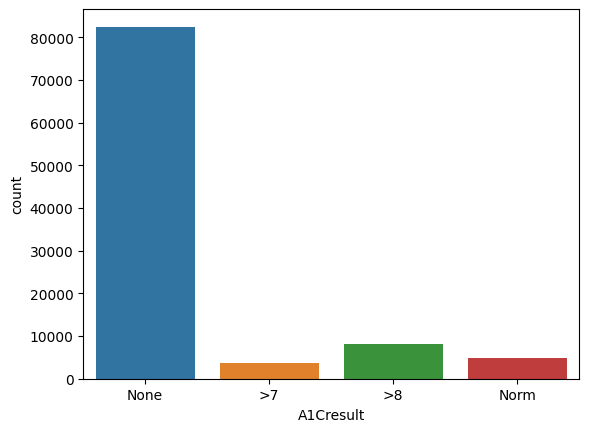

In [ ]:
# Create the count plot
sns.countplot(data=df, x='A1Cresult')
plt.show()

## Converting Data into Ordinal Numbers

In [ ]:
df['admission_type_id'].unique()

array(['Not Available', 'Emergency', 'Elective'], dtype=object)

In [ ]:
df['admission_type_id'] = df['admission_type_id'].replace({'Emergency':0, 'Elective':1,'Not Available': 2
                                                           })

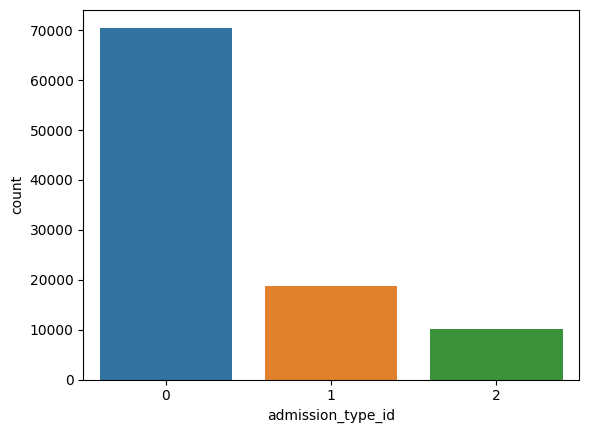

In [ ]:
# Create the count plot
sns.countplot(data=df, x='admission_type_id')
plt.show()

In [ ]:
df['discharge_disposition_id'].unique()

array(['Not Available', 'Discharged to home',
       'Transferred to another facility', 'Left AMA',
       'Still patient/referred to this institution'], dtype=object)

In [ ]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace({'Discharged to home' :0, 'Transferred to another facility' :1,'Not Available' :2,
                                                                         'Left AMA' :3, 'Still patient/referred to this institution' :4
                                                                         })

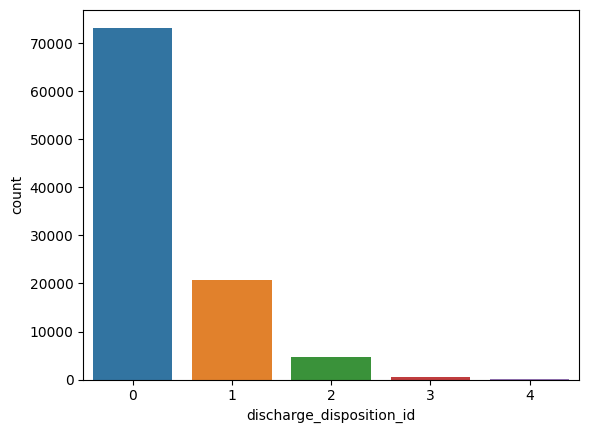

In [ ]:
# Create the count plot
sns.countplot(data=df, x='discharge_disposition_id')
plt.show()

In [ ]:
df['admission_source_id'].unique()

array(['Referral', 'Emergency', 'Transferred from hospital',
       'Not Available'], dtype=object)

In [ ]:
df['admission_source_id'] = df['admission_source_id'].replace({'Emergency' :0, 'Referral' :1,'Not Available' :2,
                                                                         'Transferred from hospital' :3
                                                                         })

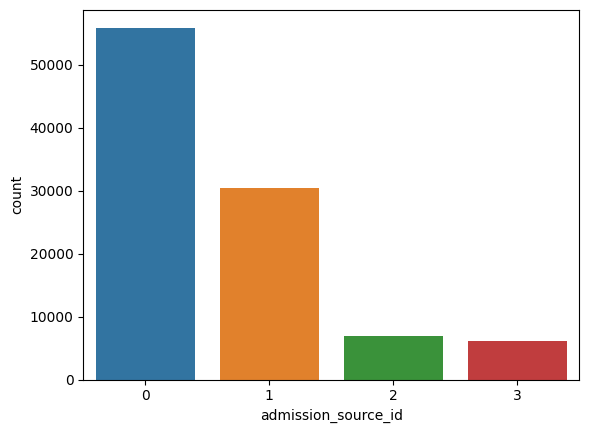

In [ ]:
# Create the count plot
sns.countplot(data=df, x='admission_source_id')
plt.show()

In [ ]:
df['A1Cresult'] = df['A1Cresult'].replace({'None': 0, 'Norm': 1, '>7': 2, '>8': 2,})

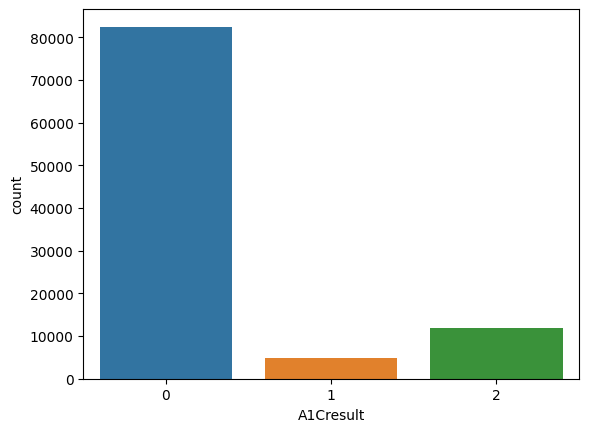

In [ ]:
# Create the count plot
sns.countplot(data=df, x='A1Cresult')
plt.show()

In [ ]:
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

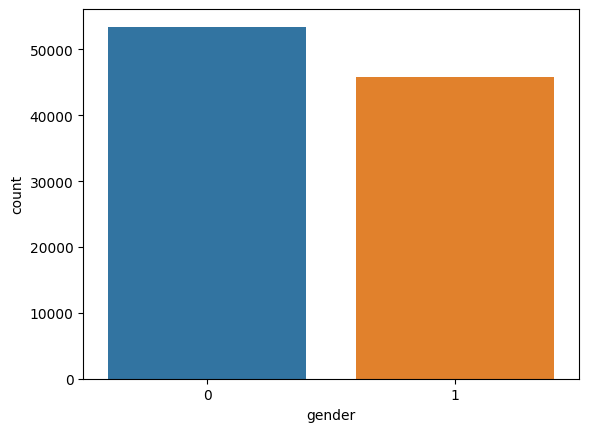

In [ ]:
# Create the count plot
sns.countplot(data=df, x='gender')
plt.show()

In [ ]:
df['change'].value_counts()

No    53206
Ch    46117
Name: change, dtype: int64

Change of medications indicates if there was a change in diabetic medication (either dosage or generic name)

In [ ]:
df['change'] = df['change'].replace({'No': 0, 'Ch': 1})

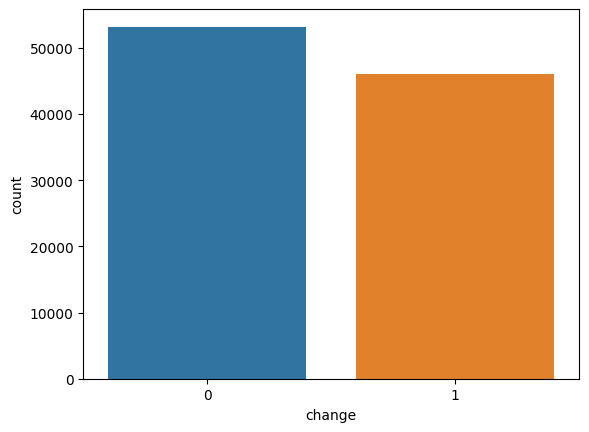

In [ ]:
# Create the count plot
sns.countplot(data=df, x='change')
plt.show()

In [ ]:
df['diabetesMed'].value_counts()

Yes    76703
No     22620
Name: diabetesMed, dtype: int64

In [ ]:
df['diabetesMed'] = df['diabetesMed'].replace({'No': 0, 'Yes': 1})

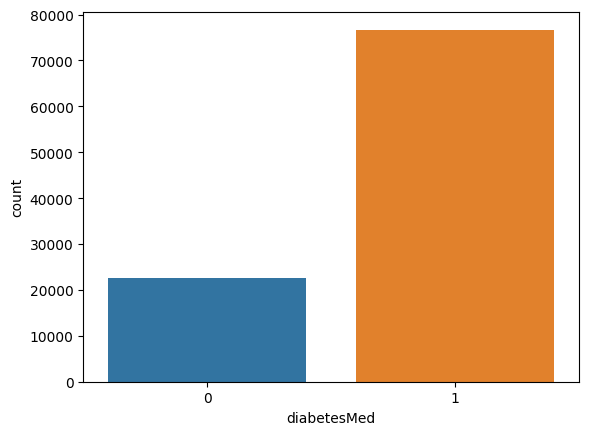

In [ ]:
# Create the count plot
sns.countplot(data=df, x='diabetesMed')
plt.show()

In [ ]:
drugs = list(df.iloc[:,16:39].columns)
drugs

['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [ ]:
for i in drugs:
  print(i, df[i].unique())

metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']


23 features for medications For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide,
glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-
metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the
drug was prescribed or there was a change in the dosage. Values: "up" if the dosage was increased during the encounter, "down' if the dosage was
decreased, "steady" if the dosage did not change, and "no' if the drug was not prescribed

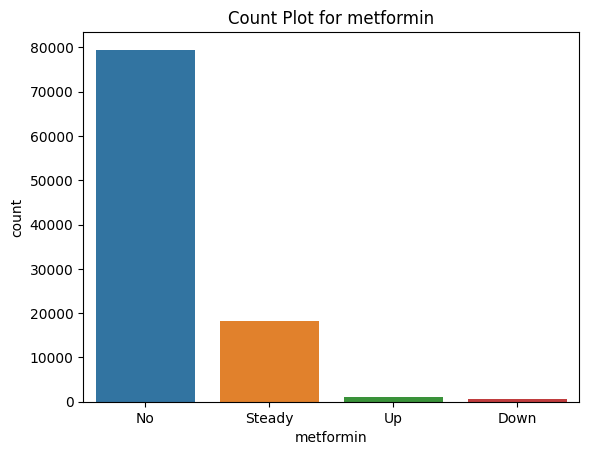

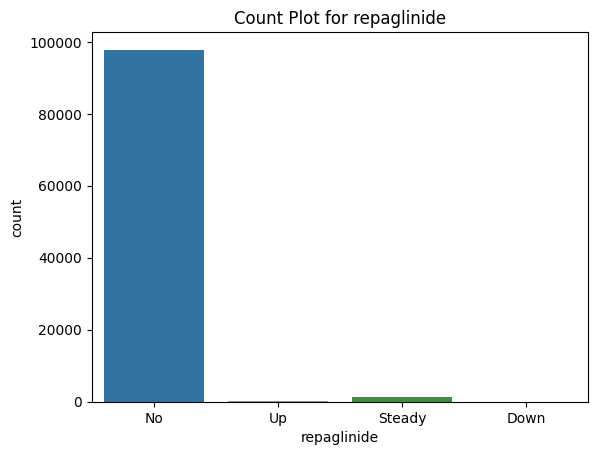

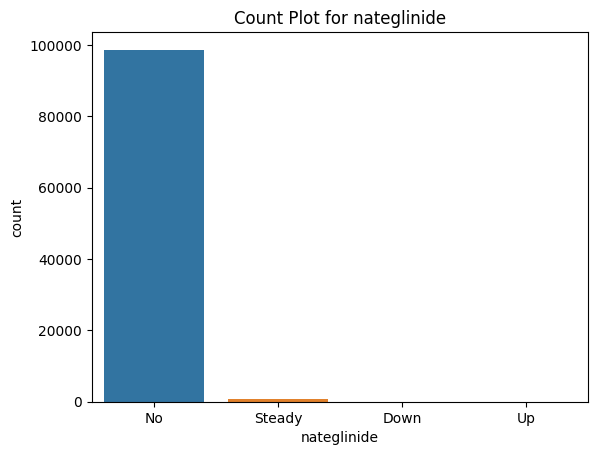

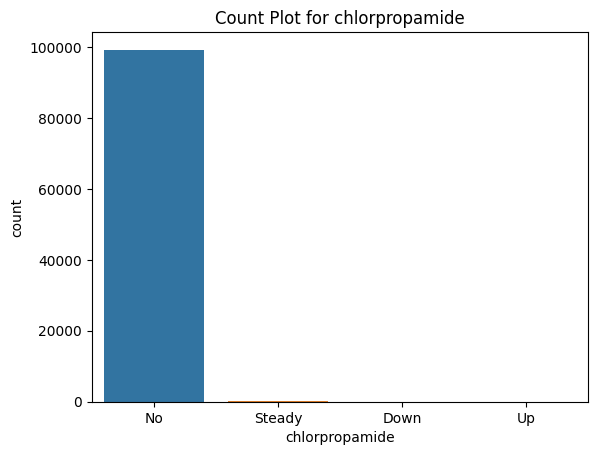

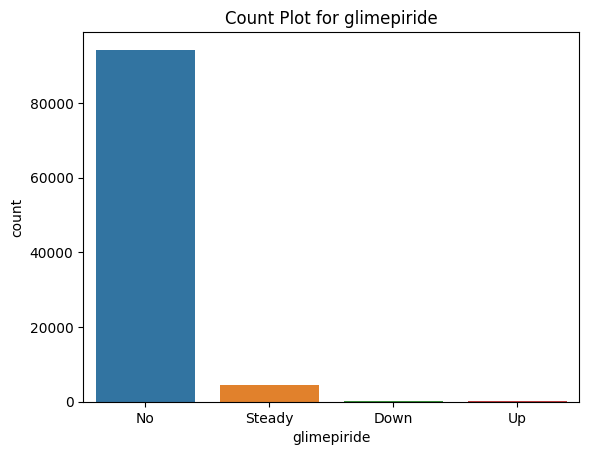

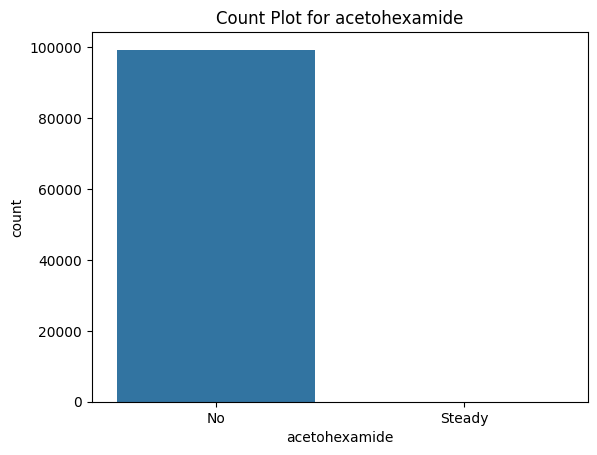

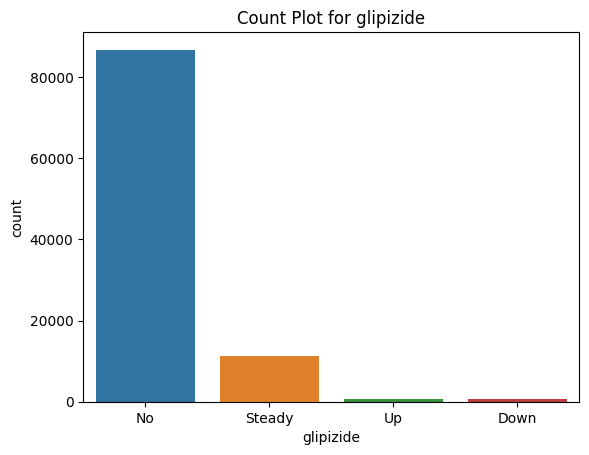

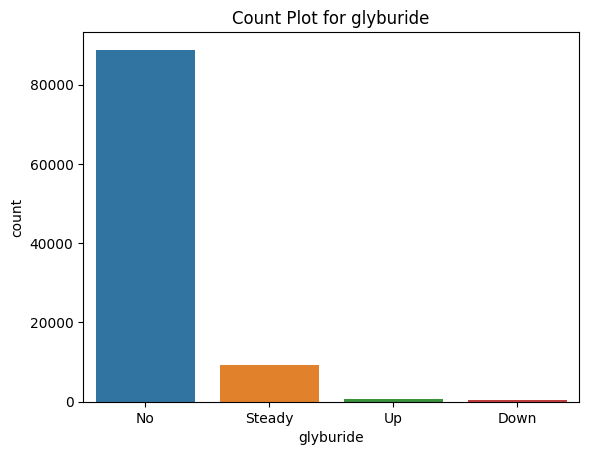

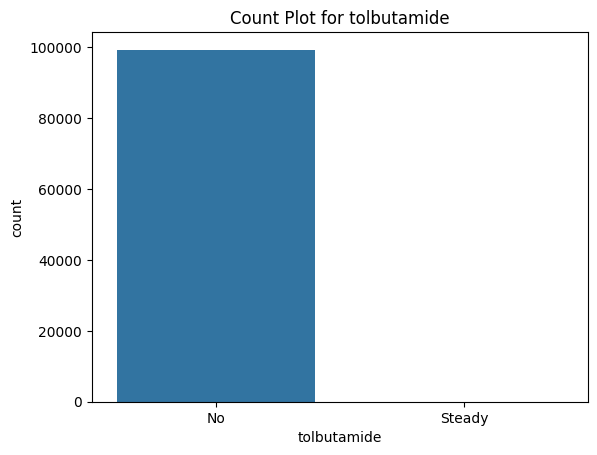

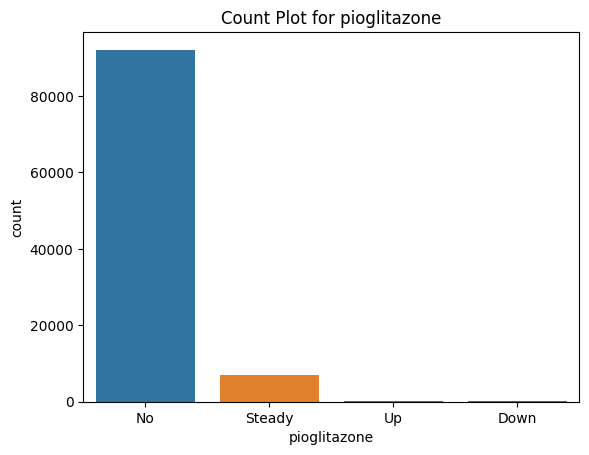

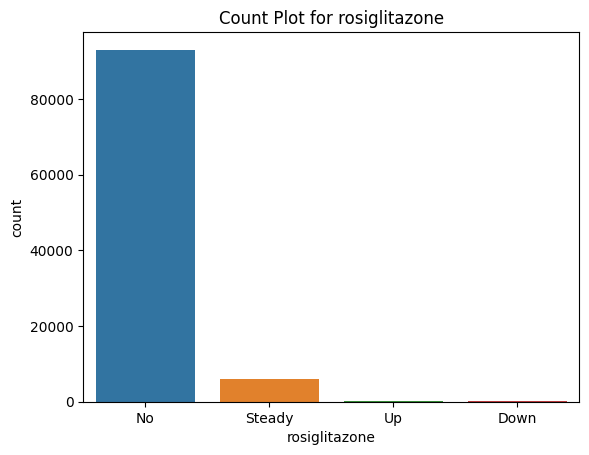

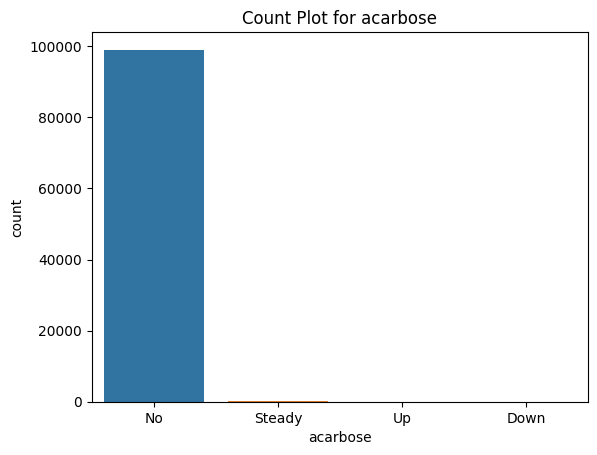

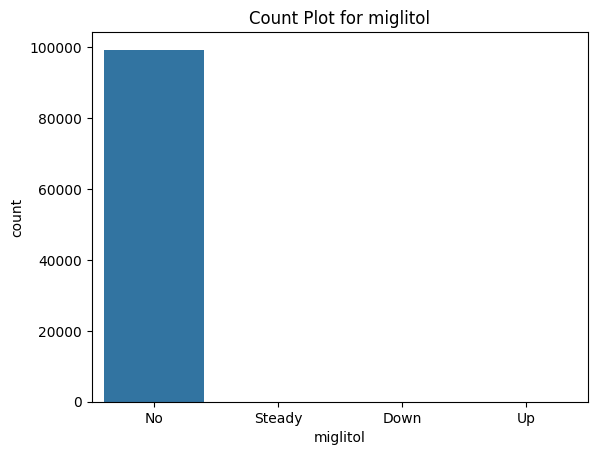

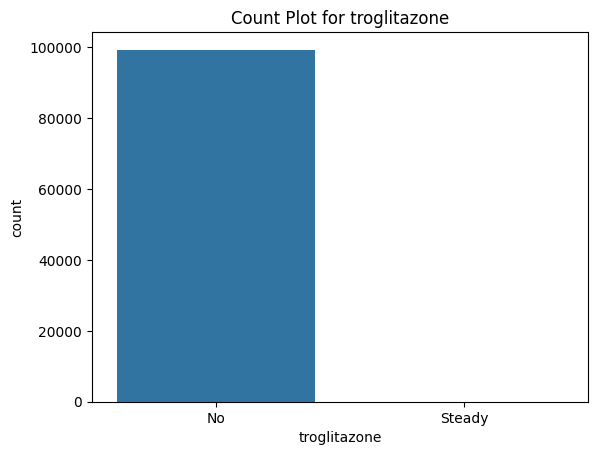

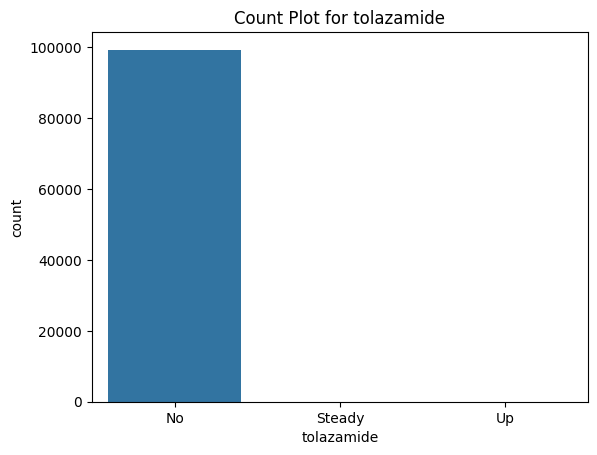

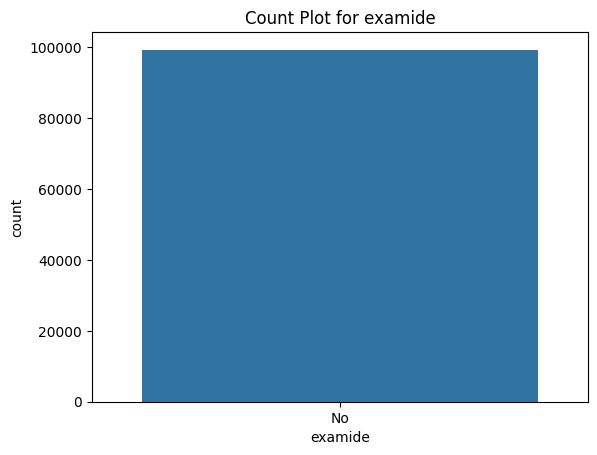

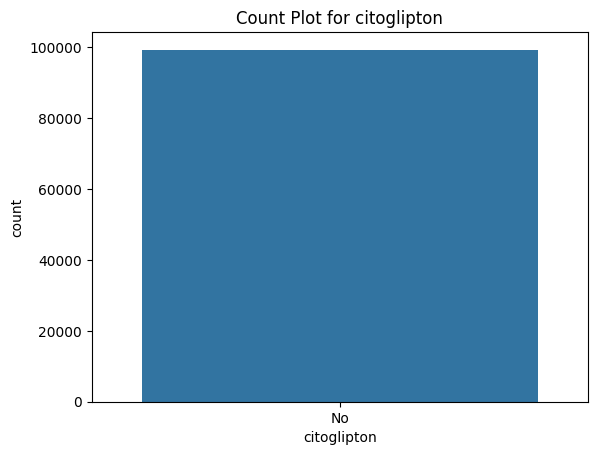

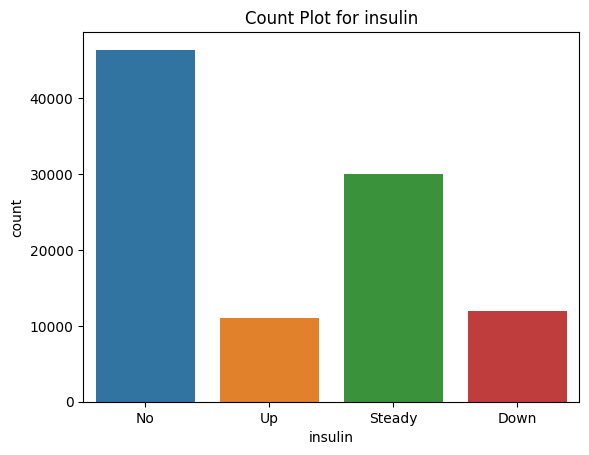

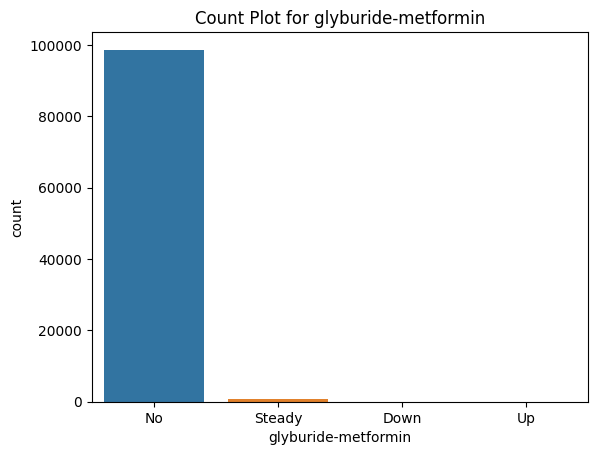

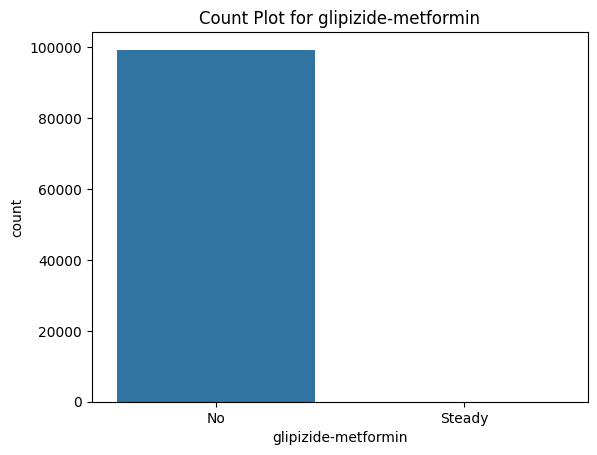

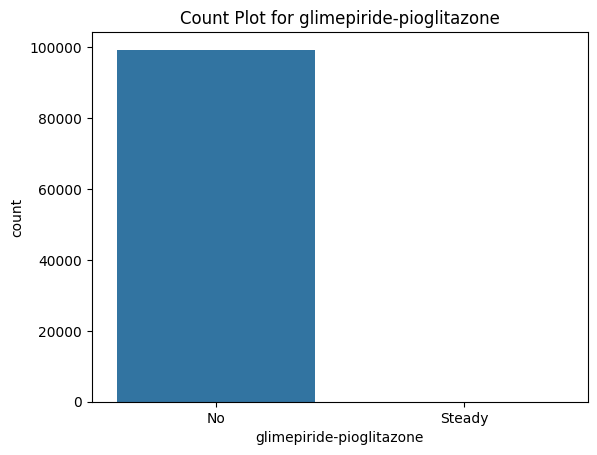

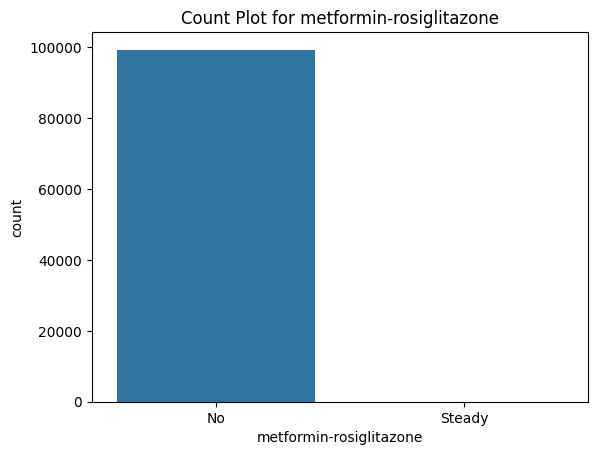

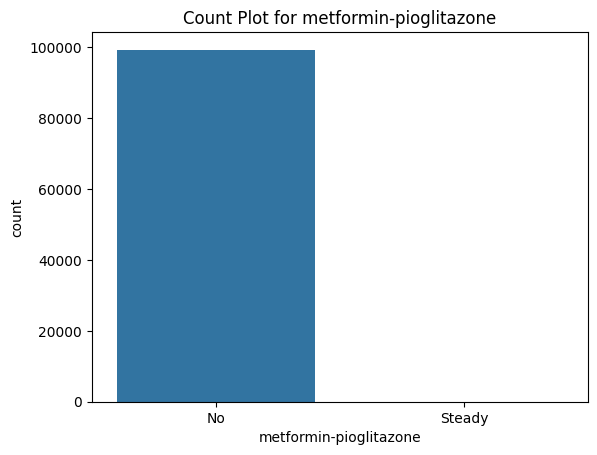

In [ ]:
for drug in drugs:
    sns.countplot(data=df, x=drug)
    plt.title(f'Count Plot for {drug}')
    plt.show()

Most of the drugs above have same value which is 'No' which means there is no changes in disages. So essentially these cannot provide any interpretive infromation for predicting readmission so we decided to drop these two variables

In [ ]:
df['citoglipton'].value_counts()

No    99323
Name: citoglipton, dtype: int64

In [ ]:
df['examide'].value_counts()

No    99323
Name: examide, dtype: int64

In [ ]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [ ]:
df = df.drop(['repaglinide',
              'nateglinide',
              'chlorpropamide',
              'glimepiride',
              'acetohexamide',
              'tolbutamide',
              'pioglitazone',
              'rosiglitazone',
              'acarbose',
              'miglitol',
              'troglitazone',
              'tolazamide',
              'glyburide-metformin',
              'glipizide-metformin',
              'glimepiride-pioglitazone',
              'metformin-rosiglitazone',
              'metformin-pioglitazone'], axis = 1)

In [ ]:
imp_drugs = ['metformin', 'glipizide', 'insulin', 'glyburide']

In [ ]:
for i in imp_drugs:
  print(i)
  print((df[i].value_counts(normalize =True)*100))

metformin
No        80.021747
Steady    18.330095
Up         1.070246
Down       0.577912
Name: metformin, dtype: float64
glipizide
No        87.385601
Steady    11.293457
Up         0.769208
Down       0.551735
Name: glipizide, dtype: float64
insulin
No        46.685058
Steady    30.265900
Down      11.989167
Up        11.059875
Name: insulin, dtype: float64
glyburide
No        89.407287
Steady     9.222436
Up         0.806460
Down       0.563817
Name: glyburide, dtype: float64


In [ ]:
for i in imp_drugs:
  df[i] = df[i].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [ ]:
for i in imp_drugs:
  print(i, df[i].unique())

metformin [0 1]
glipizide [0 1]
insulin [0 1]
glyburide [0 1]


In [ ]:
for i in imp_drugs:
  print (i)
  print(df[i].value_counts())

metformin
0    97686
1     1637
Name: metformin, dtype: int64
glipizide
0    98011
1     1312
Name: glipizide, dtype: int64
insulin
0    76430
1    22893
Name: insulin, dtype: int64
glyburide
0    97962
1     1361
Name: glyburide, dtype: int64


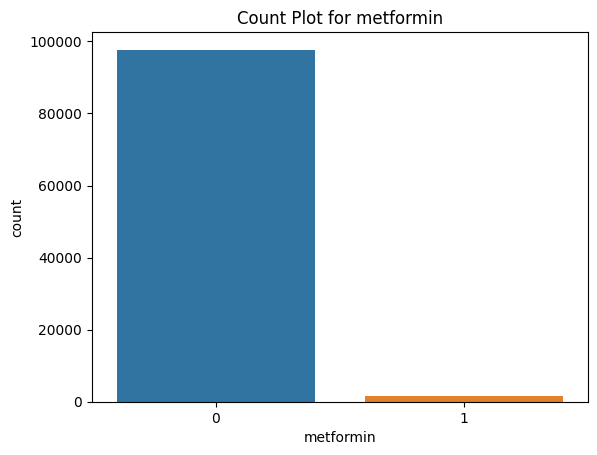

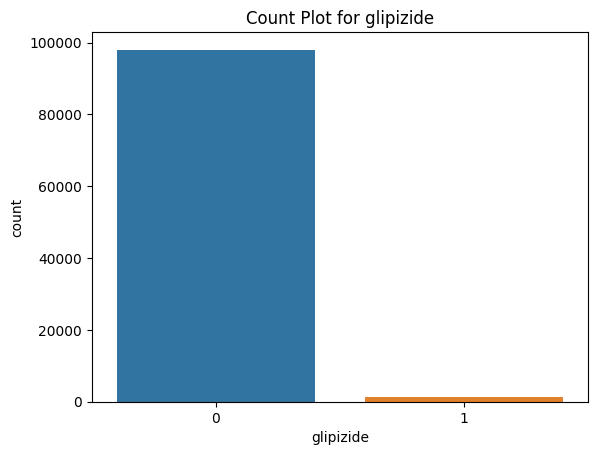

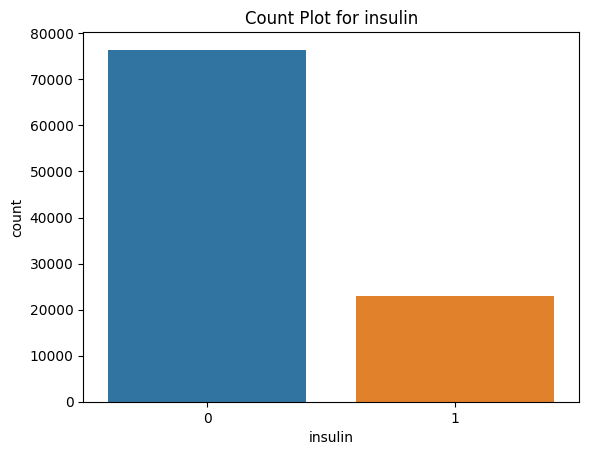

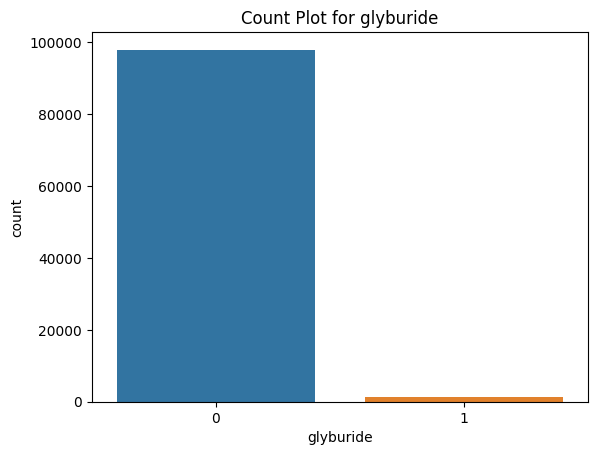

In [ ]:
for imp_drugs in imp_drugs:
    sns.countplot(data=df, x=imp_drugs)
    plt.title(f'Count Plot for {imp_drugs}')
    plt.show()

In [ ]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

<Axes: xlabel='race', ylabel='count'>

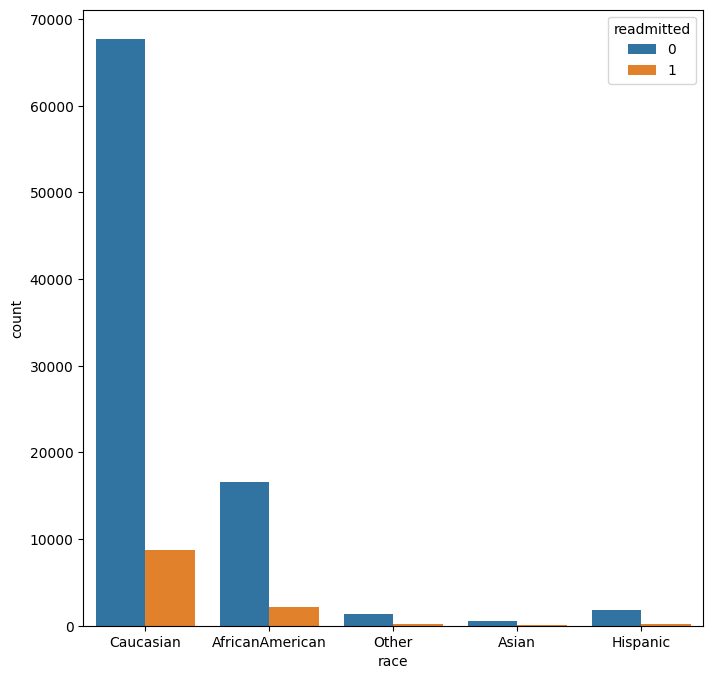

In [ ]:
fig = plt.figure(figsize = (8,8))
sns.countplot(x = df['race'], hue = df['readmitted'])

In [ ]:
df.drop(['race'], inplace = True, axis = 1)

Text(0.5, 1.0, 'Gender VS Readmission')

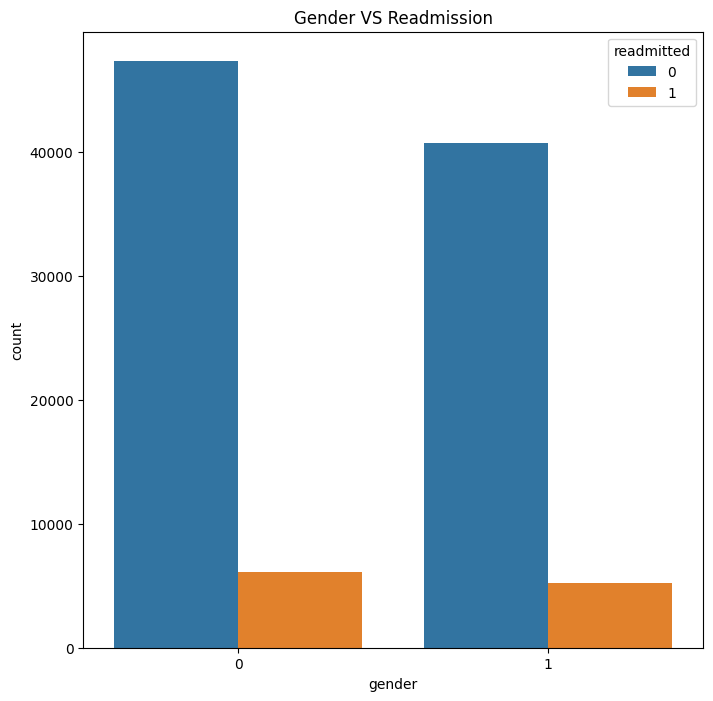

In [ ]:
fig = plt.figure(figsize = (8,8))
sns.countplot(x = df['gender'], hue = df['readmitted']).set_title('Gender VS Readmission')

In [ ]:
df.head()

gender  age  admission_type_id  discharge_disposition_id  \
0       0    7                  2                         2   
1       0   17                  0                         0   
2       0   20                  0                         0   
3       1   37                  0                         0   
4       1   42                  0                         0   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    0                 3                  59               0   
2                    0                 2                  11               5   
3                    0                 2                  44               1   
4                    0                 1                  51               0   

   num_medications  diag_1  ...  max_glu_serum  A1Cresult  metformin  \
0                1     3.0  ...              0          0          0   
1               18     3.0  ...              0          0          0   
2               13    11.0  ...              0          0          0   
3               16     1.0  ...              0          0          0   
4                8     2.0  ...              0          0          0   

   glipizide  glyburide  insulin  change  diabetesMed  readmitted  \
0          0          0        0       0            0           0   
1          0          0        1       1            1           0   
2          0          0        0       0            1           0   
3          0          0        1       1            1           0   
4          0          0        0       1            1           0   

   service_utilization  
0                    0  
1                    0  
2                    3  
3                    0  
4                    0  

[5 rows x 23 columns]

In [ ]:
df.shape

(99323, 23)

##Visualization

In [ ]:
clean_df = df
clean_df

gender  age  admission_type_id  discharge_disposition_id  \
0            0    7                  2                         2   
1            0   17                  0                         0   
2            0   20                  0                         0   
3            1   37                  0                         0   
4            1   42                  0                         0   
...        ...  ...                ...                       ...   
101761       1   80                  0                         1   
101762       0   85                  0                         1   
101763       1   70                  0                         0   
101764       0   90                  0                         1   
101765       1   79                  0                         0   

        admission_source_id  time_in_hospital  num_lab_procedures  \
0                         1                 1                  41   
1                         0                 3                  59   
2                         0                 2                  11   
3                         0                 2                  44   
4                         0                 1                  51   
...                     ...               ...                 ...   
101761                    0                 3                  51   
101762                    3                 5                  33   
101763                    0                 1                  53   
101764                    0                10                  45   
101765                    0                 6                  13   

        num_procedures  num_medications  diag_1  ...  max_glu_serum  \
0                    0                1     3.0  ...              0   
1                    0               18     3.0  ...              0   
2                    5               13    11.0  ...              0   
3                    1               16     1.0  ...              0   
4                    0                8     2.0  ...              0   
...                ...              ...     ...  ...            ...   
101761               0               16     3.0  ...              0   
101762               3               18     9.0  ...              0   
101763               0                9     1.0  ...              0   
101764               2               21    17.0  ...              0   
101765               3                3     9.0  ...              0   

        A1Cresult  metformin  glipizide  glyburide  insulin  change  \
0               0          0          0          0        0       0   
1               0          0          0          0        1       1   
2               0          0          0          0        0       0   
3               0          0          0          0        1       1   
4               0          0          0          0        0       1   
...           ...        ...        ...        ...      ...     ...   
101761          2          0          0          0        1       1   
101762          0          0          0          0        0       0   
101763          0          0          0          0        1       1   
101764          0          0          0          0        1       1   
101765          0          0          0          0        0       0   

        diabetesMed  readmitted  service_utilization  
0                 0           0                    0  
1                 1           0                    0  
2                 1           0                    3  
3                 1           0                    0  
4                 1           0                    0  
...             ...         ...                  ...  
101761            1           0                    0  
101762            1           0                    1  
101763            1           0                    1  
101764            1           0                    1  
101765            0           0                    

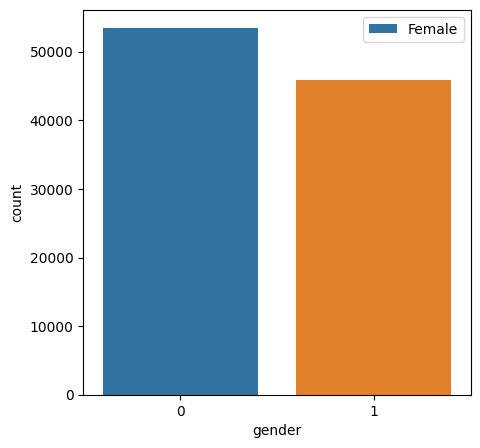

In [ ]:
fig = plt.figure(figsize = (5,5))
sns.countplot(x = clean_df['gender'])
plt.legend(['Female'])


<Axes: xlabel='age', ylabel='count'>

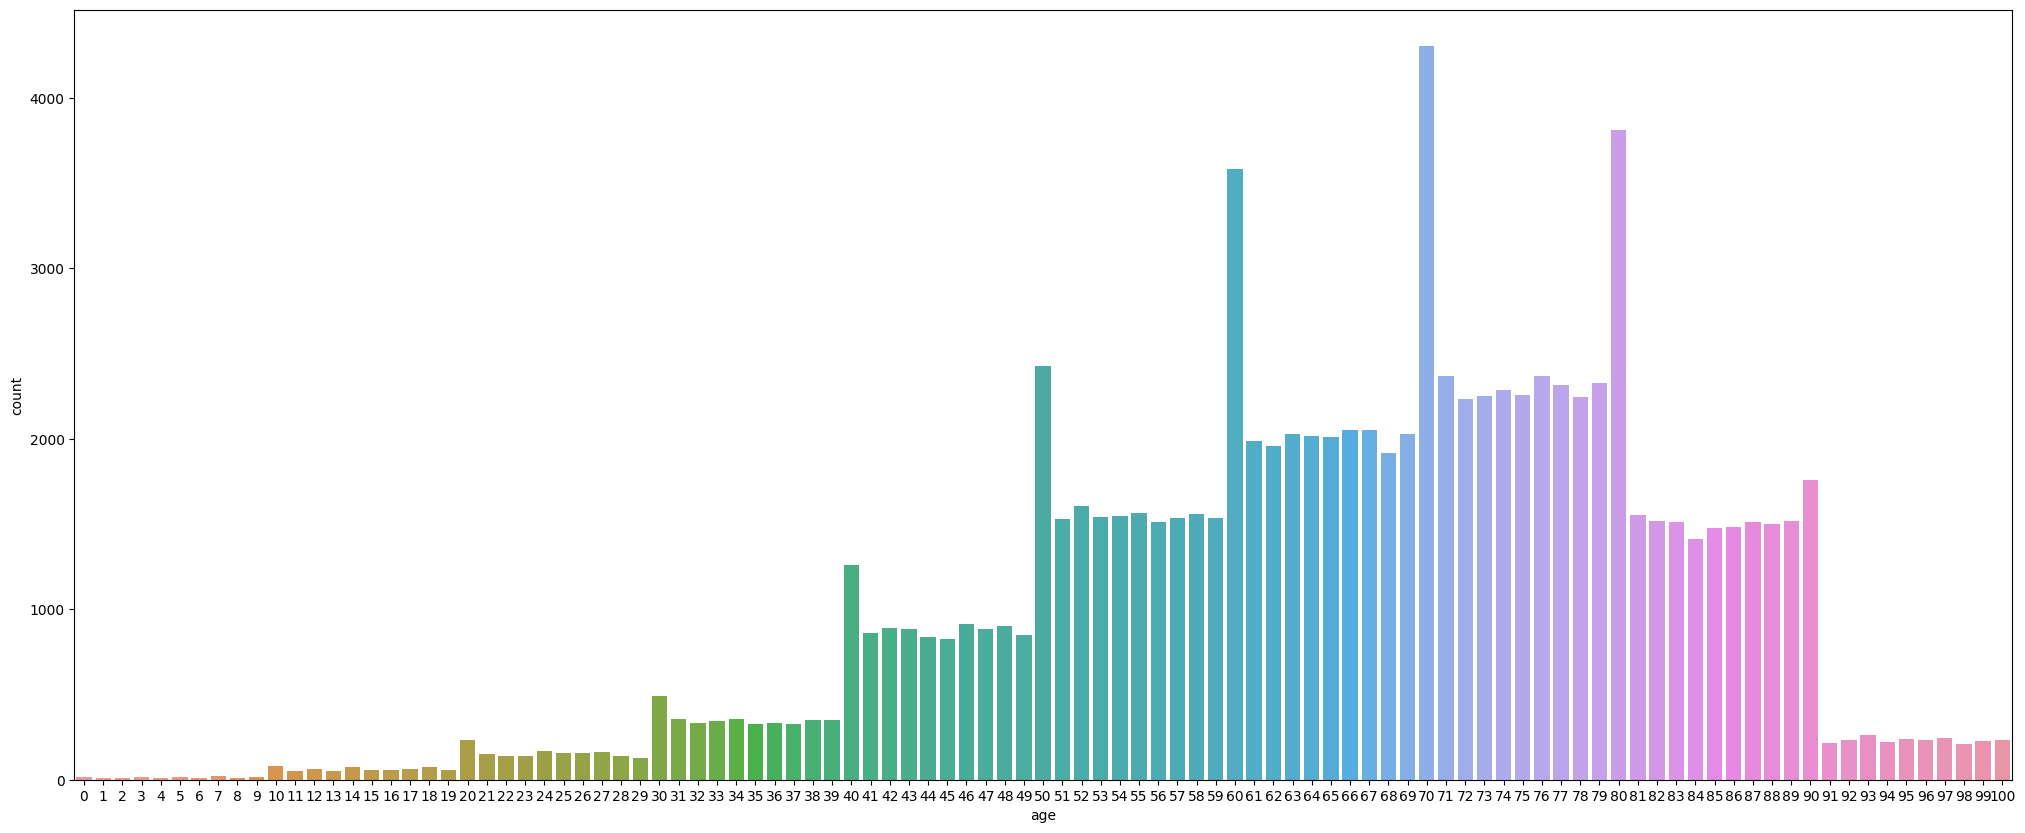

In [ ]:
fig = plt.figure(figsize = (25,10))
sns.countplot(x = clean_df['age'])

<Axes: xlabel='time_in_hospital', ylabel='count'>

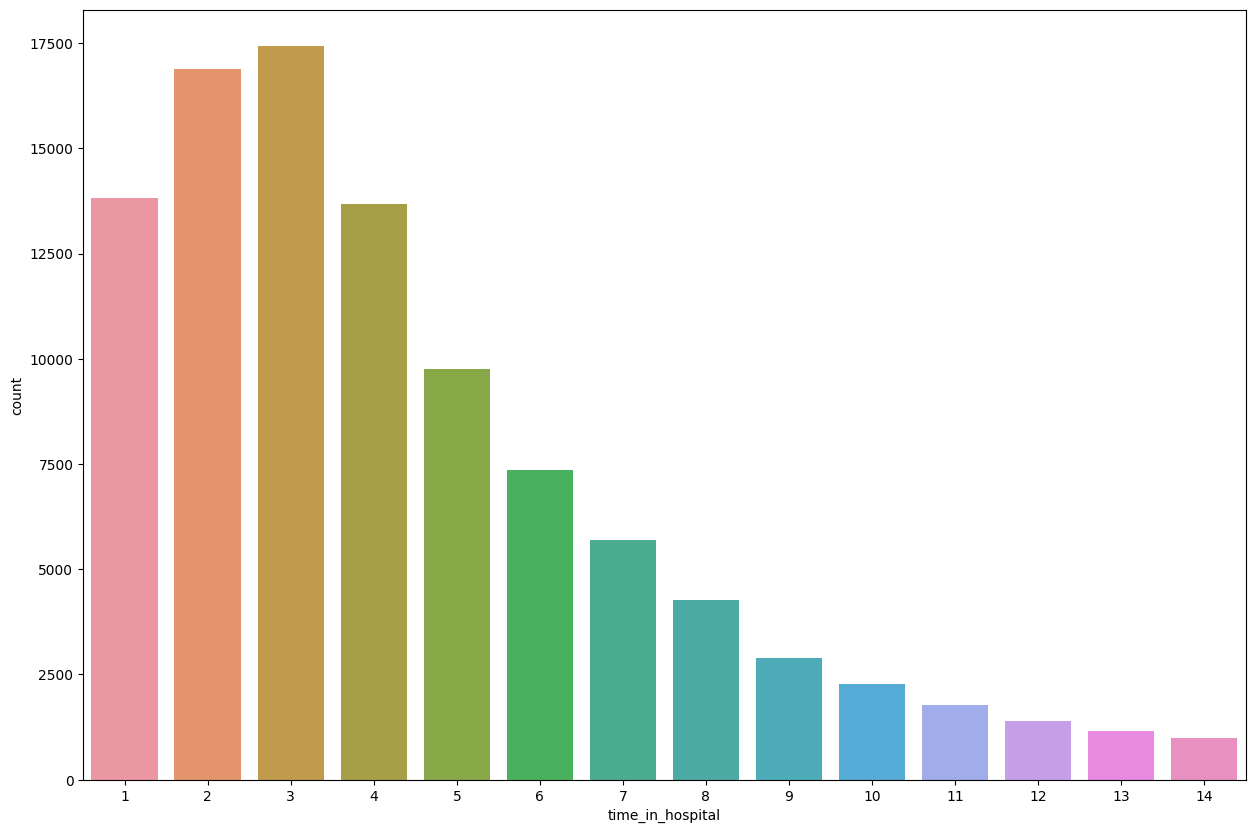

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.countplot(x = clean_df['time_in_hospital'])

<Axes: xlabel='num_lab_procedures', ylabel='count'>

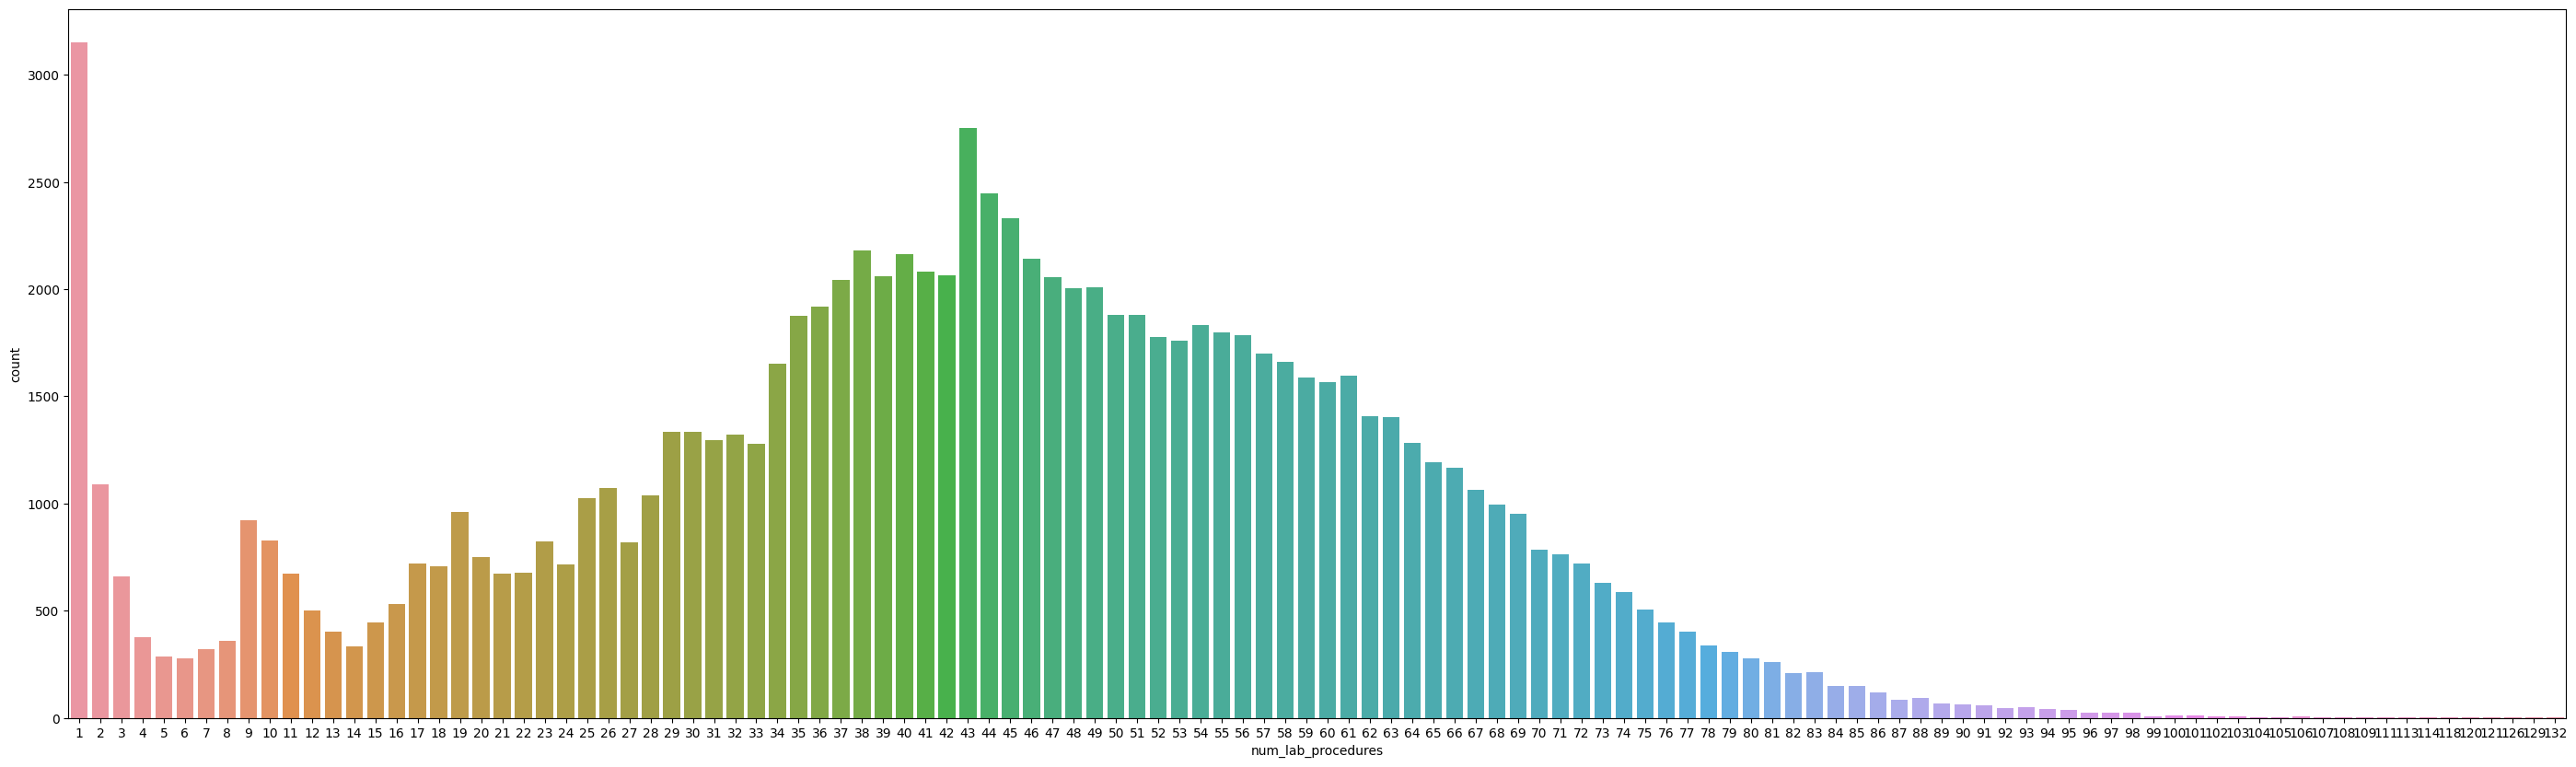

In [ ]:
fig = plt.figure(figsize = (35,10))
sns.countplot(x = clean_df['num_lab_procedures'])

<Axes: xlabel='num_procedures', ylabel='count'>

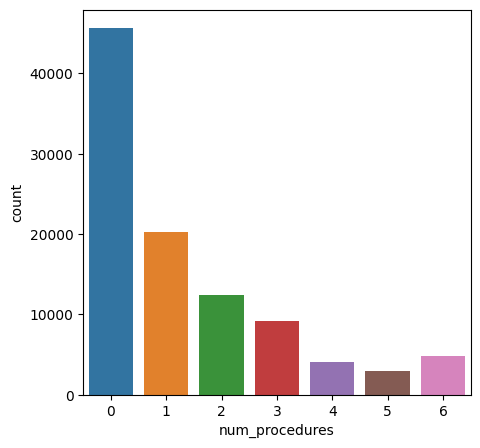

In [ ]:
fig = plt.figure(figsize = (5,5))
sns.countplot(x = clean_df['num_procedures'])

Text(0.5, 1.0, 'First Diagnose')

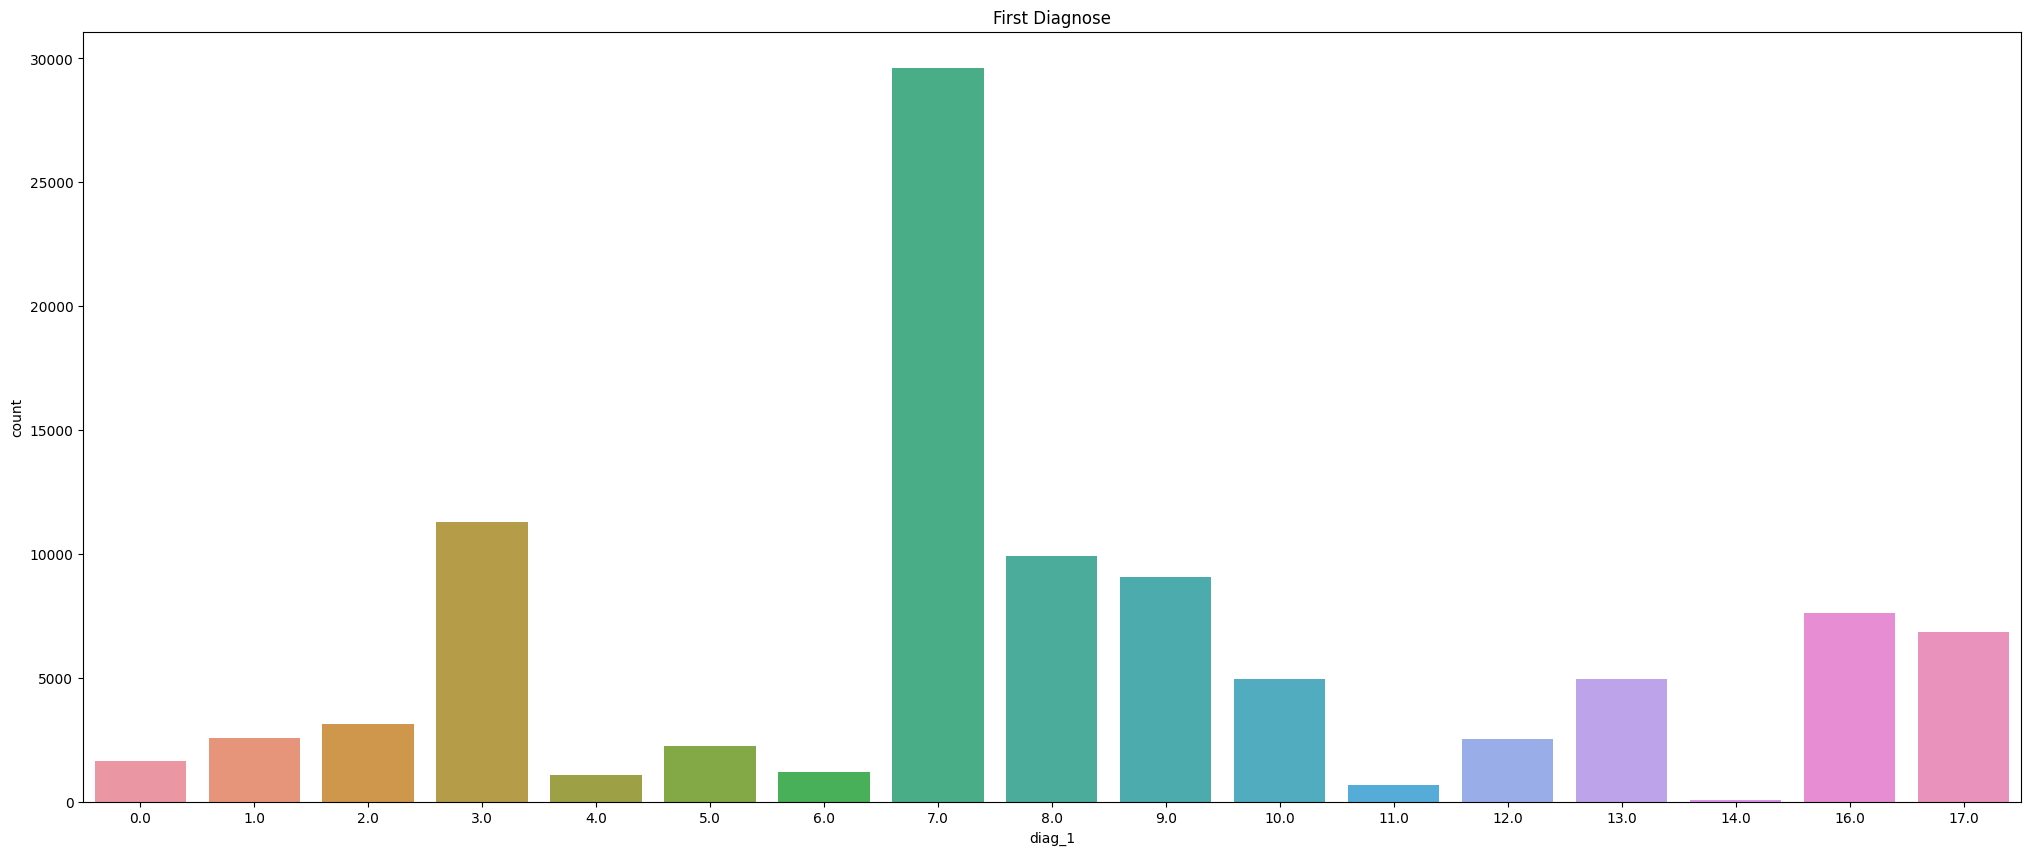

In [ ]:
fig = plt.figure(figsize = (25,10))
sns.countplot(x = clean_df['diag_1'])
plt.title("First Diagnose")

Text(0.5, 1.0, 'Second Diagnose')

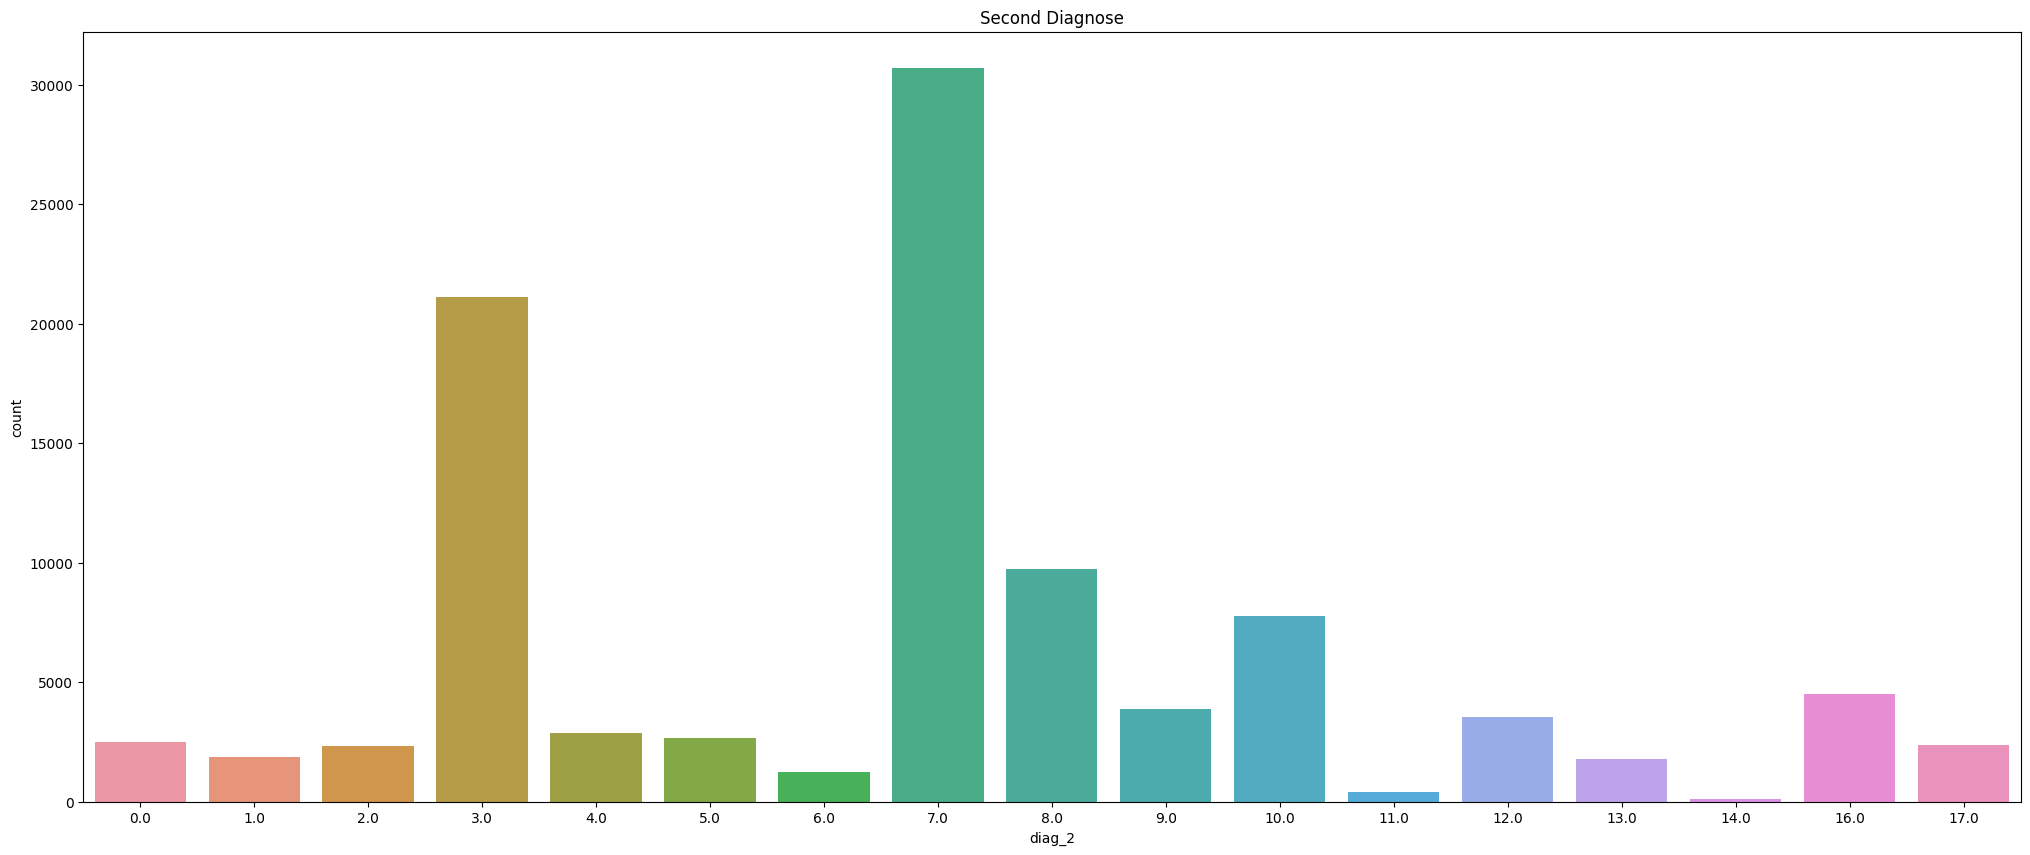

In [ ]:
fig = plt.figure(figsize = (25,10))
sns.countplot(x = clean_df['diag_2'])
plt.title("Second Diagnose")

Text(0.5, 1.0, 'Third Diagnose')

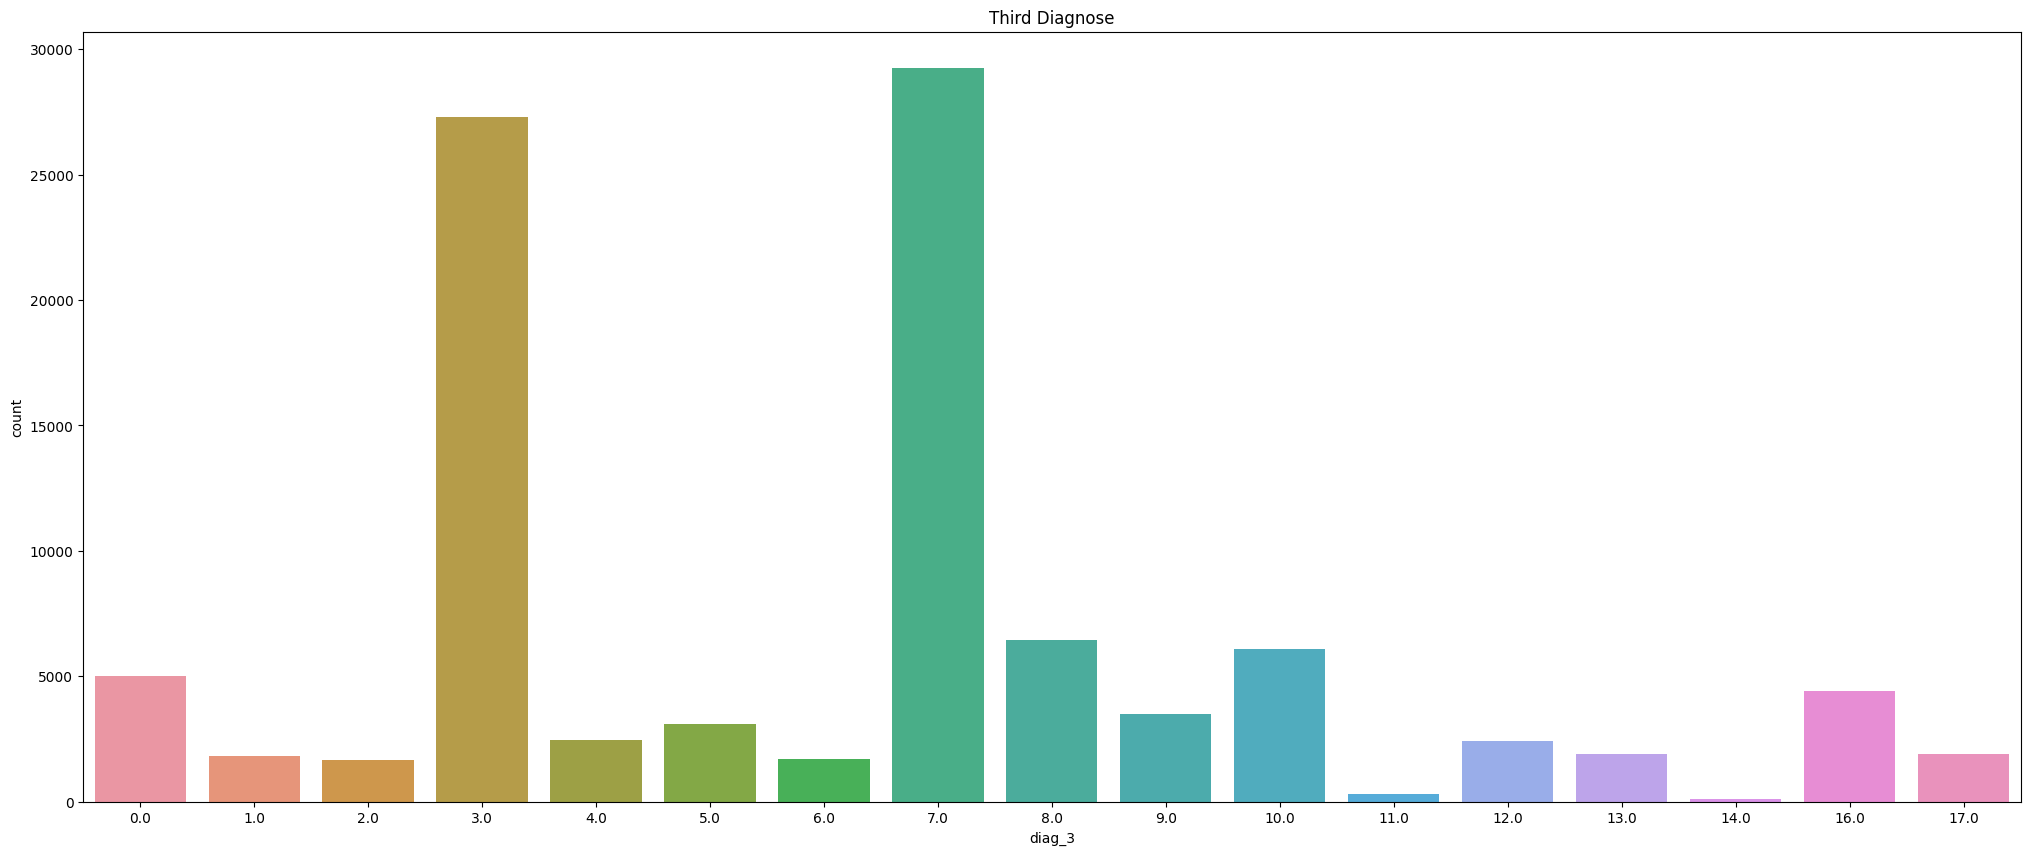

In [ ]:
fig = plt.figure(figsize = (25,10))
sns.countplot(x = clean_df['diag_3'])
plt.title("Third Diagnose")

Text(0.5, 1.0, 'number_diagnoses')

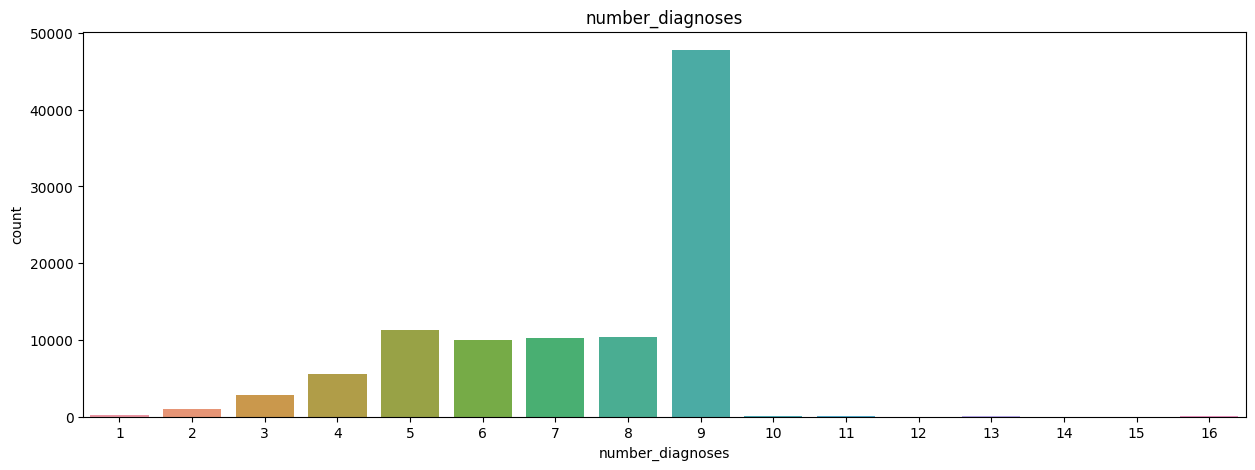

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=clean_df['number_diagnoses'])
plt.title("number_diagnoses")

Text(0.5, 1.0, 'max_glu_serum')

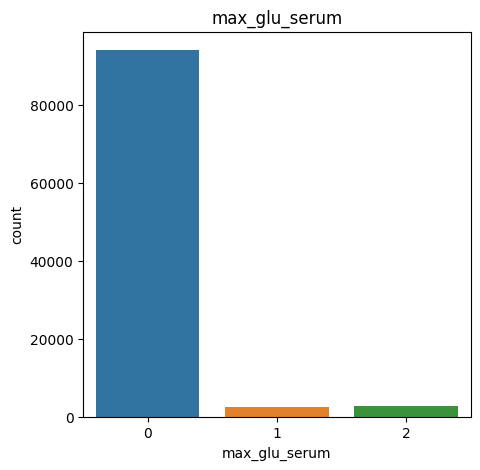

In [ ]:
fig = plt.figure(figsize = (5,5))
sns.countplot(x = clean_df['max_glu_serum'])
plt.title("max_glu_serum")

Text(0.5, 1.0, 'A1Cresult')

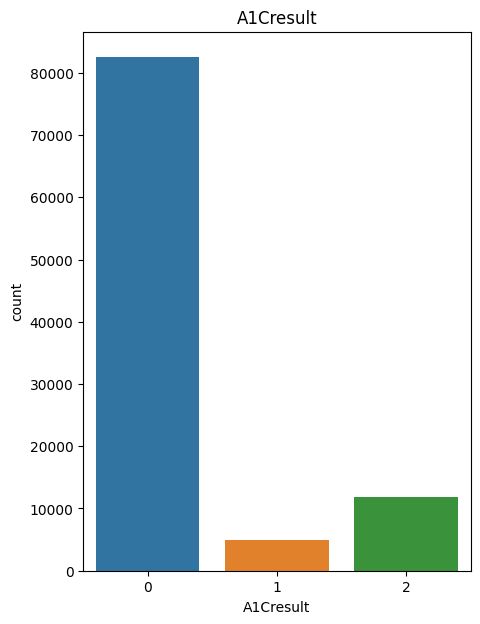

In [ ]:
fig = plt.figure(figsize = (5,7))
sns.countplot(x = clean_df['A1Cresult'])
plt.title("A1Cresult")

Text(0.5, 1.0, 'metformin')

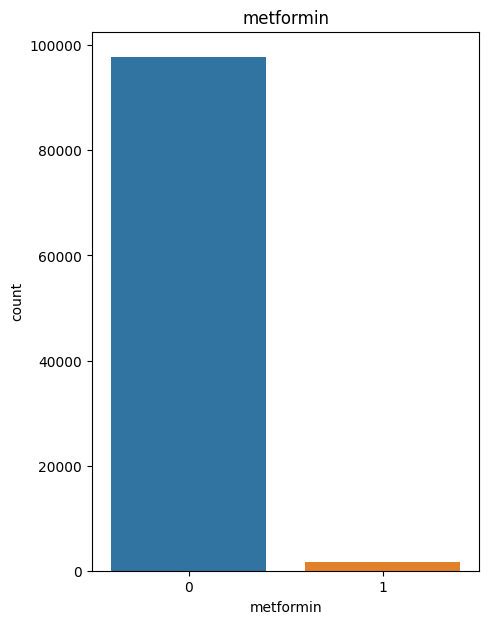

In [ ]:
fig = plt.figure(figsize = (5,7))
sns.countplot(x = clean_df['metformin'])
plt.title("metformin")

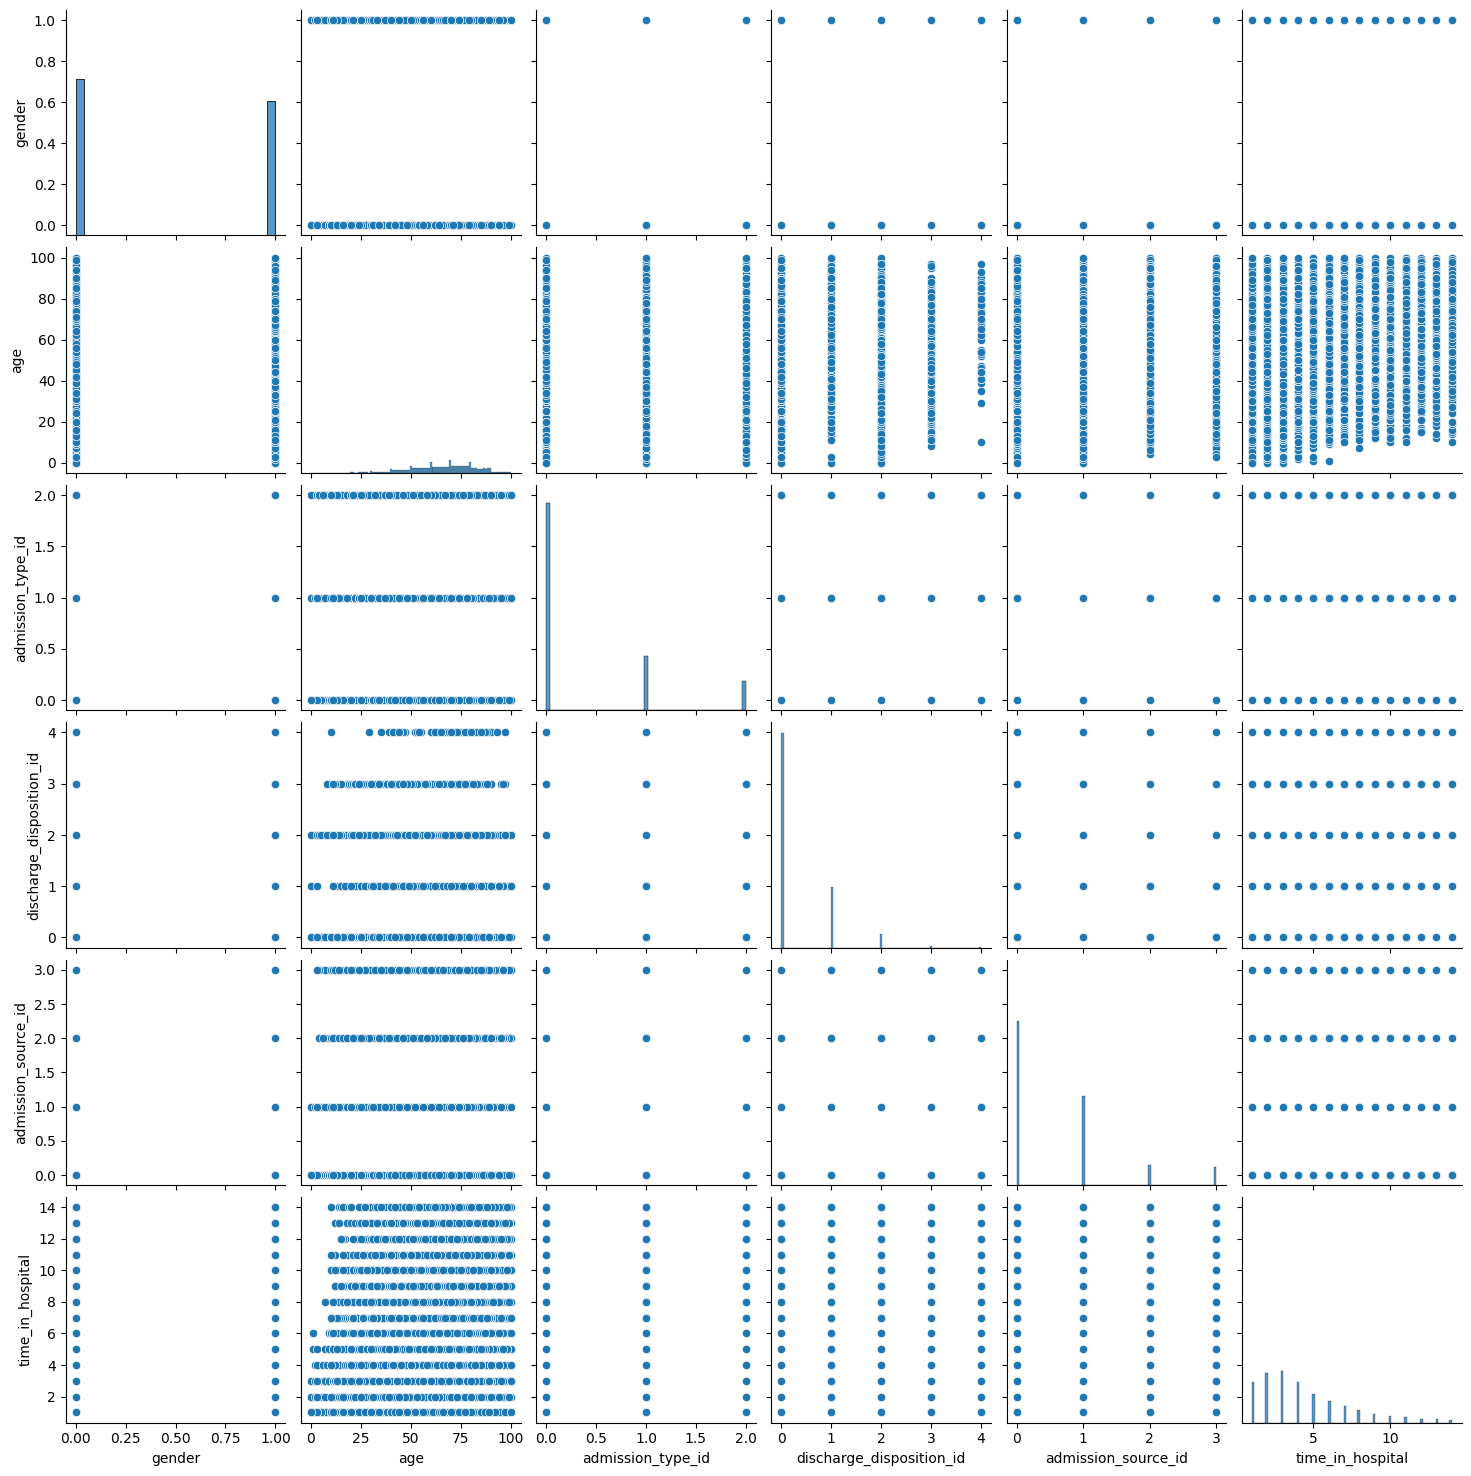

In [ ]:
sns.pairplot(clean_df[["gender","age", "admission_type_id","discharge_disposition_id","admission_source_id","time_in_hospital"]])#This line generates a pair plot for the specified columns in the bike_data DataFrame
plt.show()#This line displays the figure containing the pair plot.

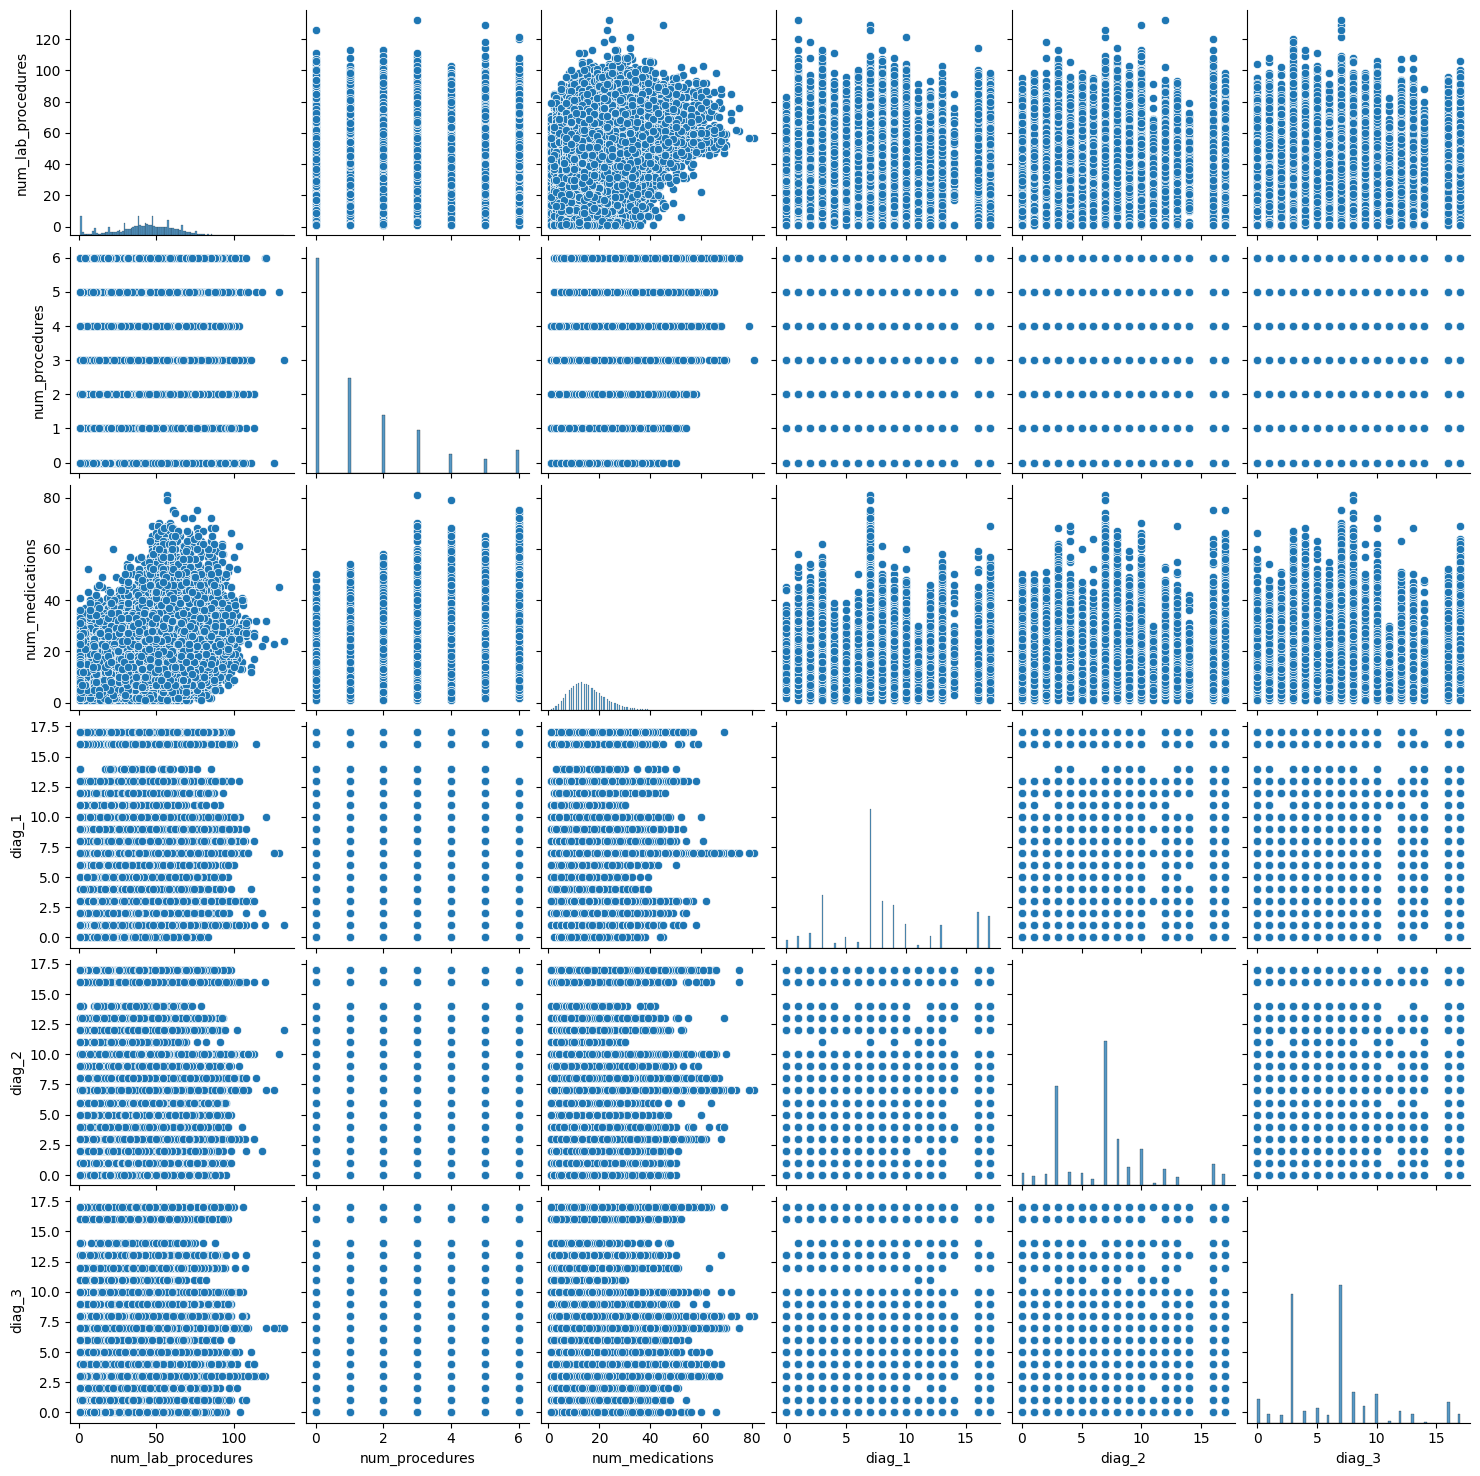

In [ ]:
sns.pairplot(clean_df[["num_lab_procedures", "num_procedures", "num_medications","diag_1","diag_2","diag_3"]])#This line generates a pair plot for the specified columns in the bike_data DataFrame
plt.show()#This line displays the figure containing the pair plot.

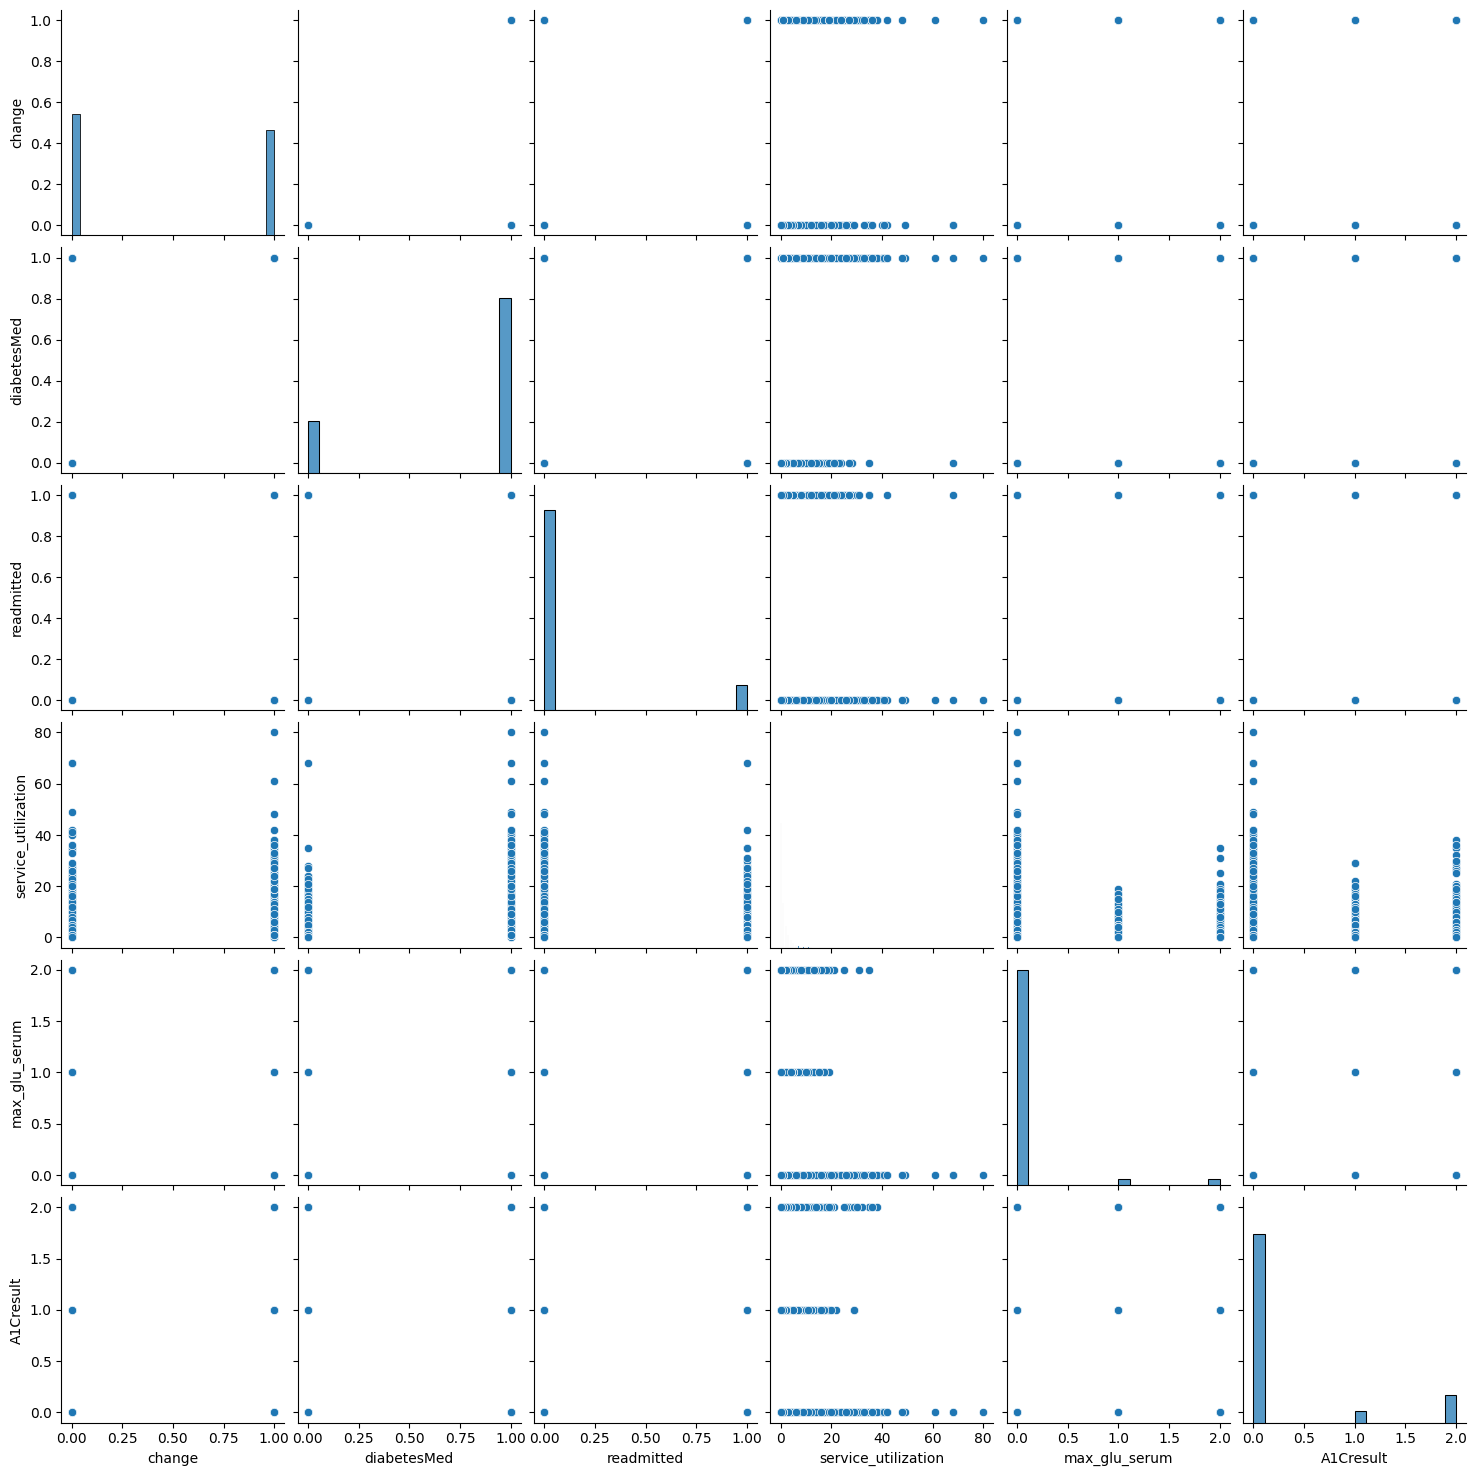

In [ ]:
sns.pairplot(clean_df[["change","diabetesMed","readmitted","service_utilization","max_glu_serum","A1Cresult"]])#This line generates a pair plot for the specified columns in the bike_data DataFrame
plt.show()#This line displays the figure containing the pair plot.

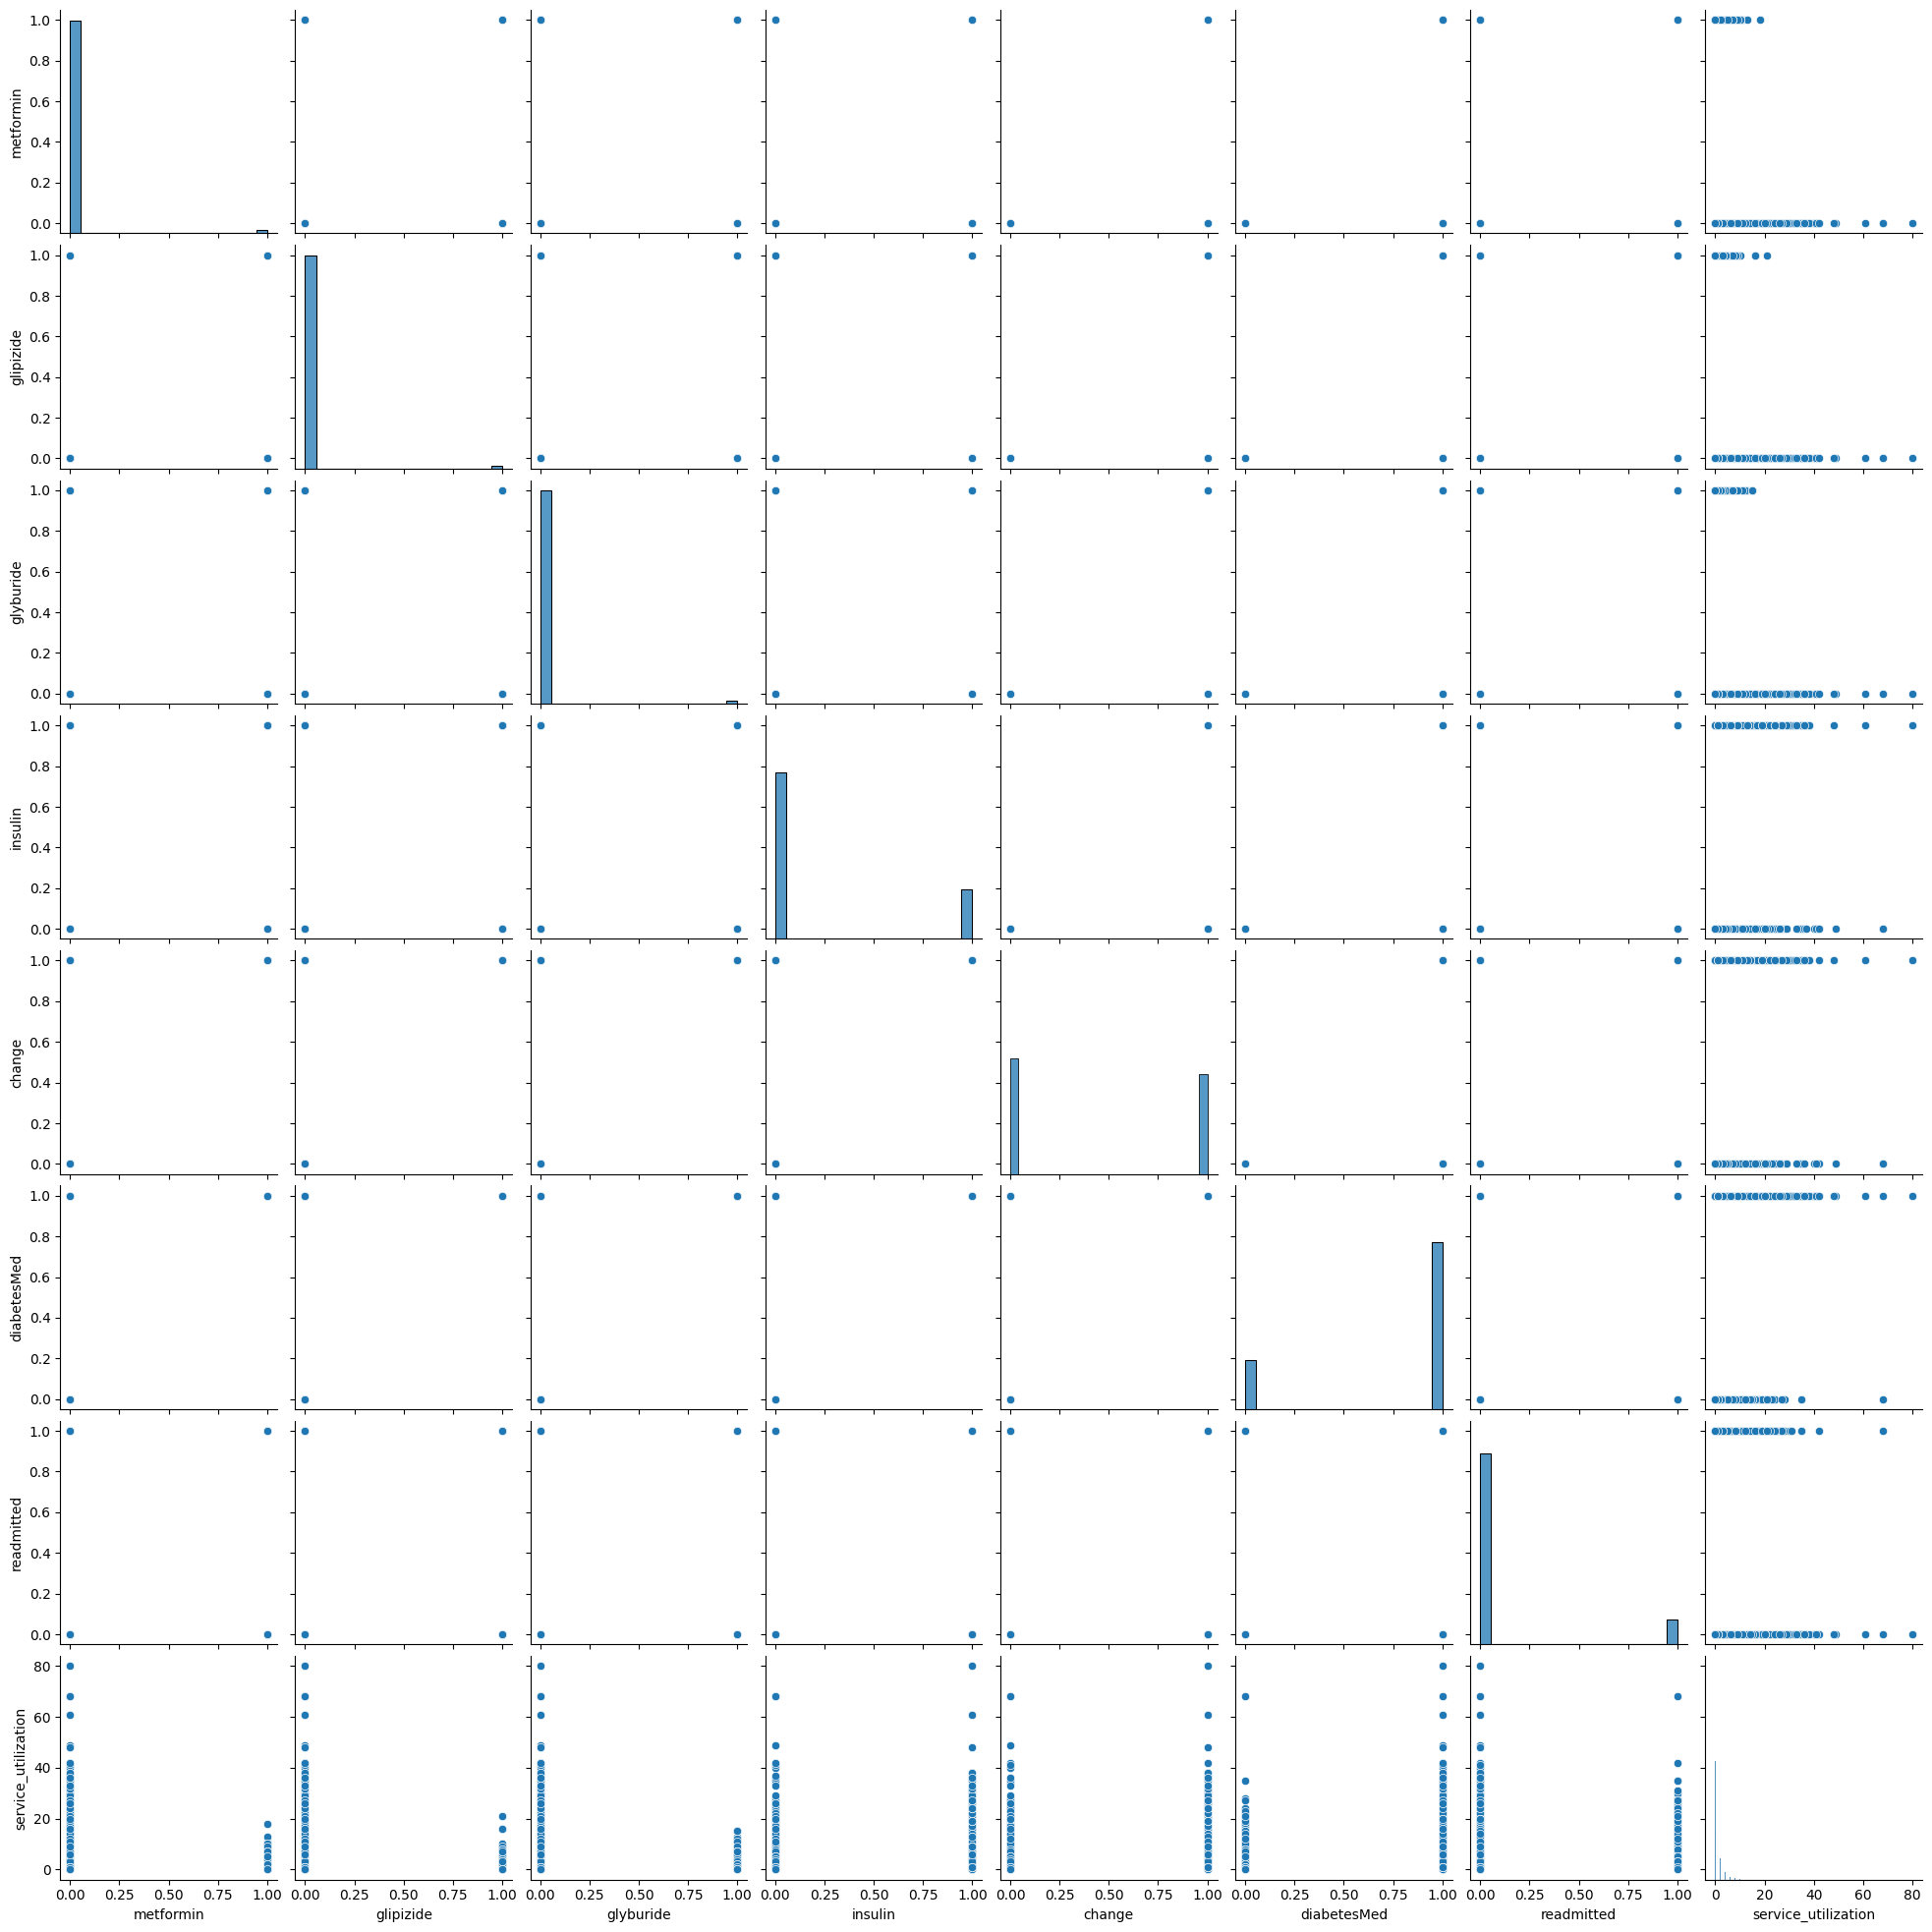

In [ ]:
sns.pairplot(clean_df[["metformin","glipizide","glyburide","insulin","change","diabetesMed","readmitted","service_utilization"]])#This line generates a pair plot for the specified columns in the bike_data DataFrame
plt.show()#This line displays the figure containing the pair plot.

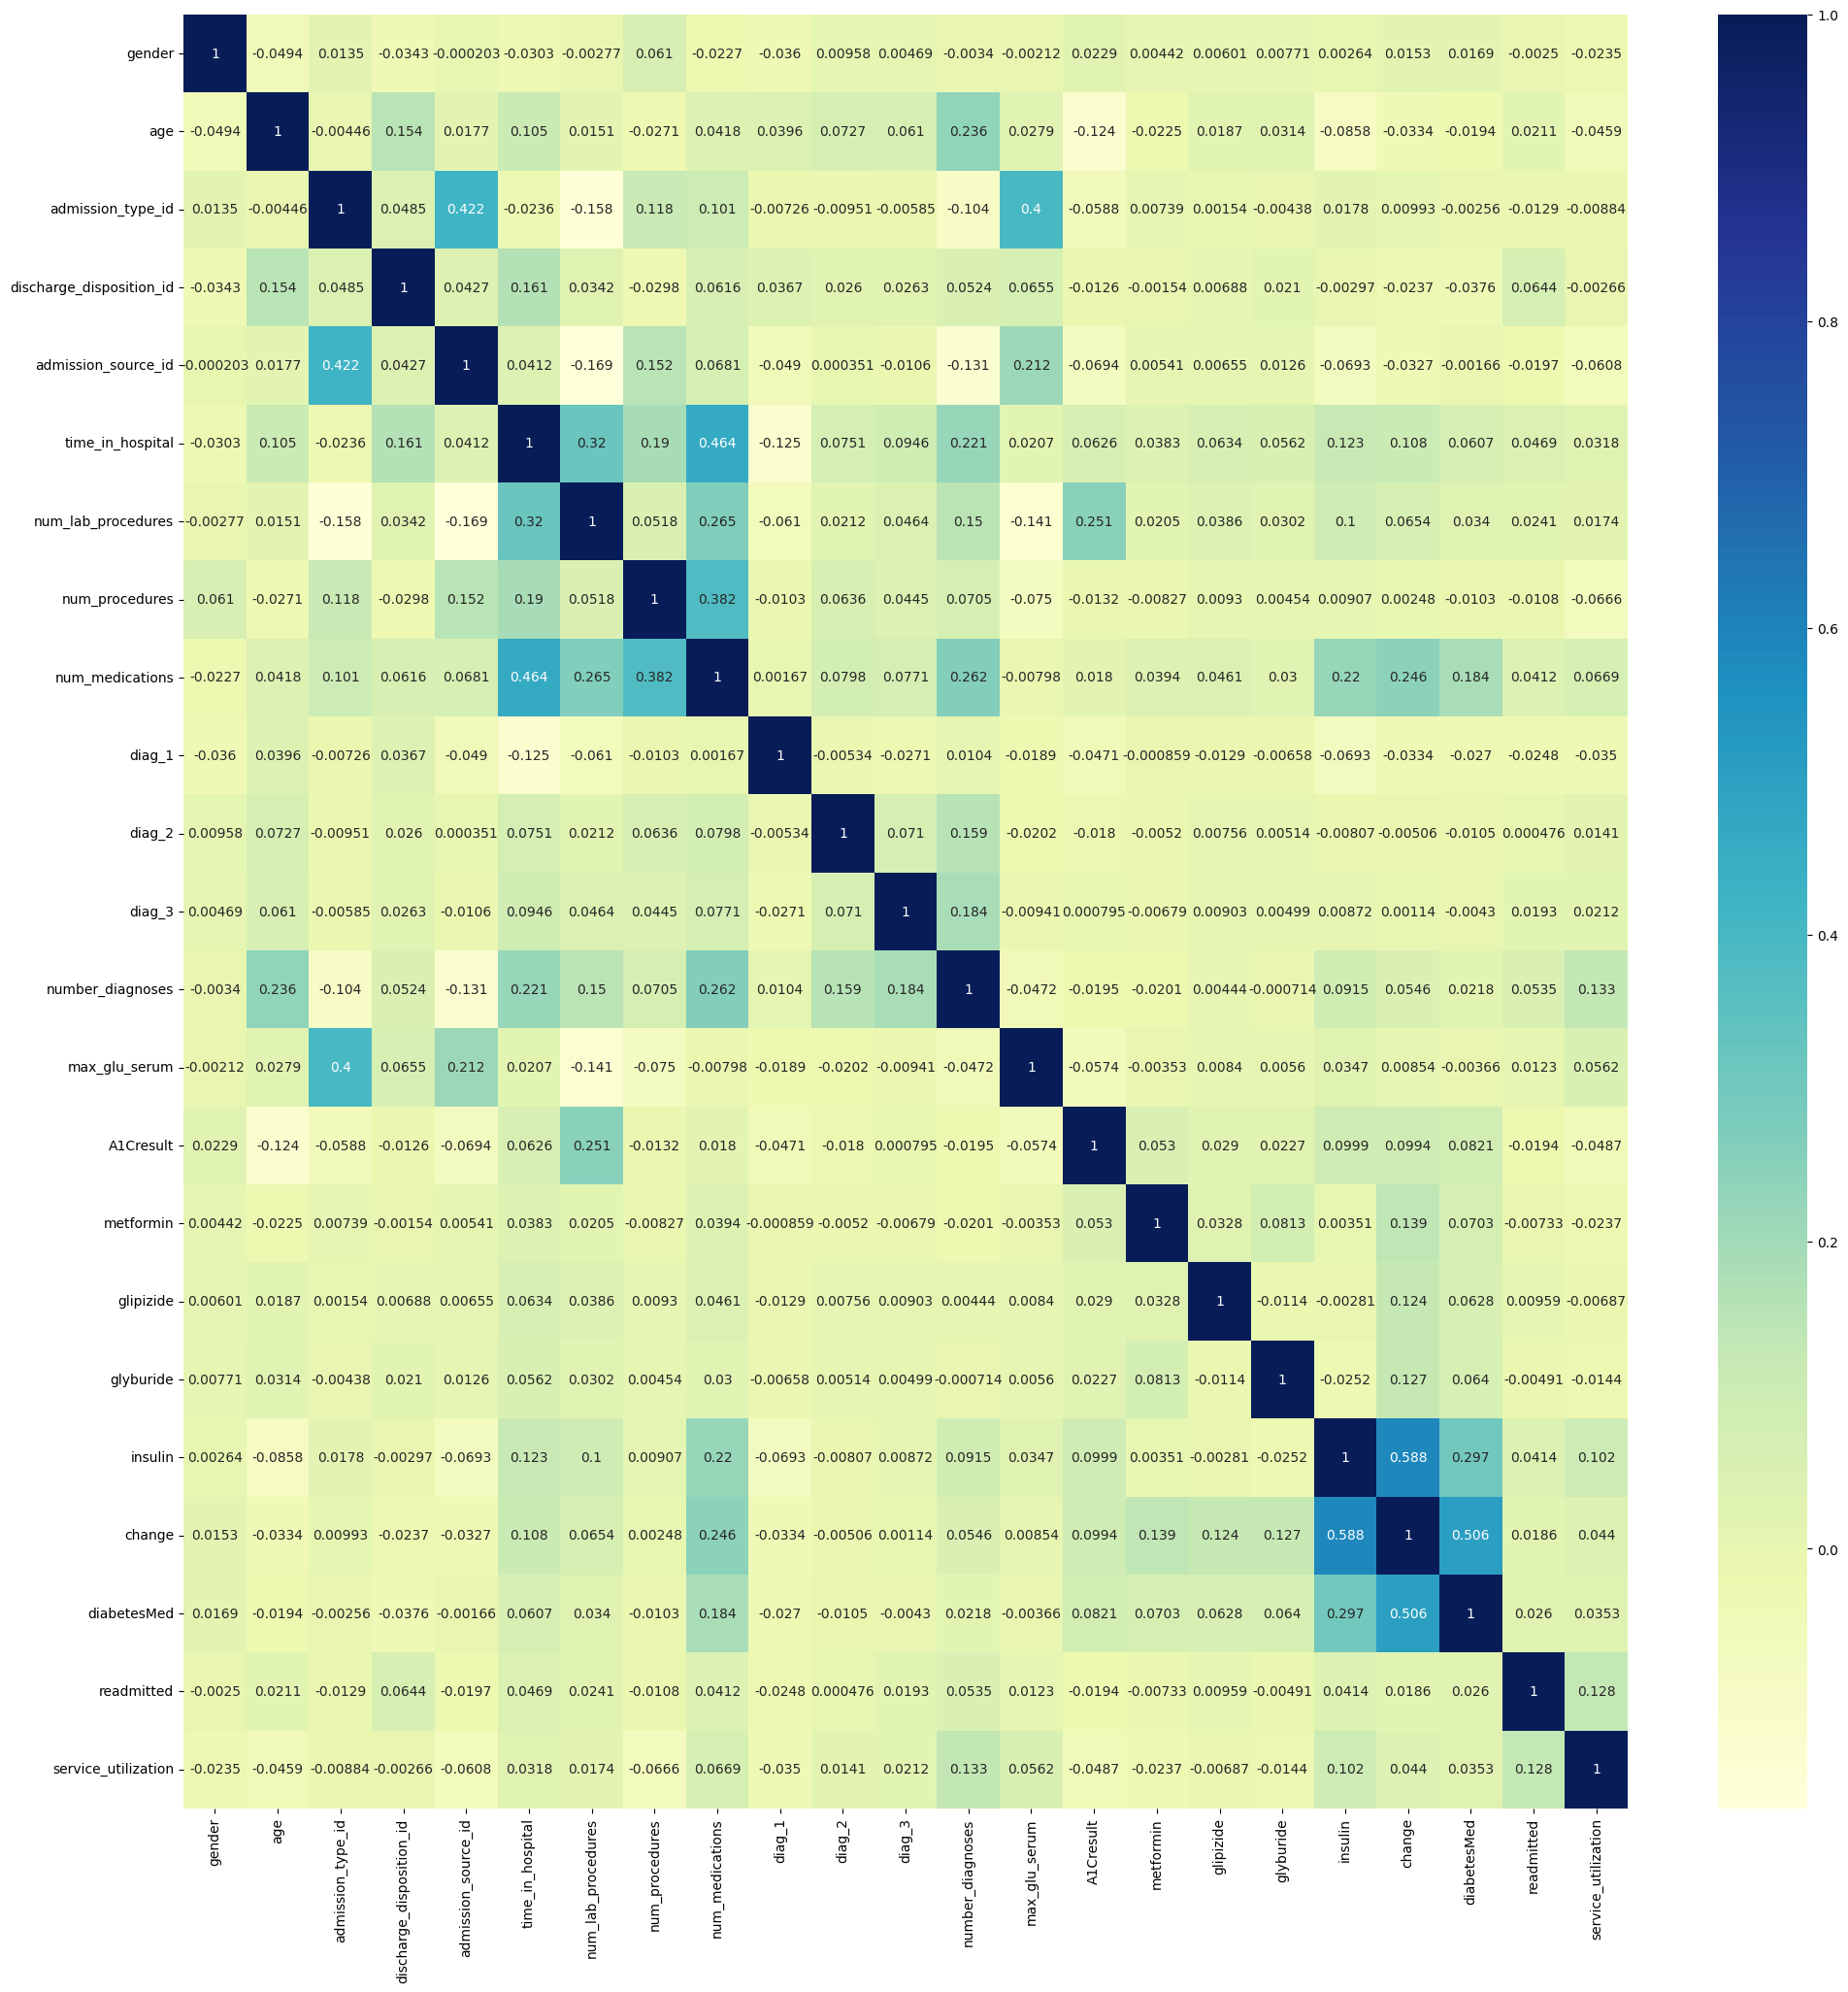

In [ ]:
plt.figure(figsize = (24, 24))#This line creates a new figure and sets its size to (24, 24) inches
sns.heatmap(clean_df.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

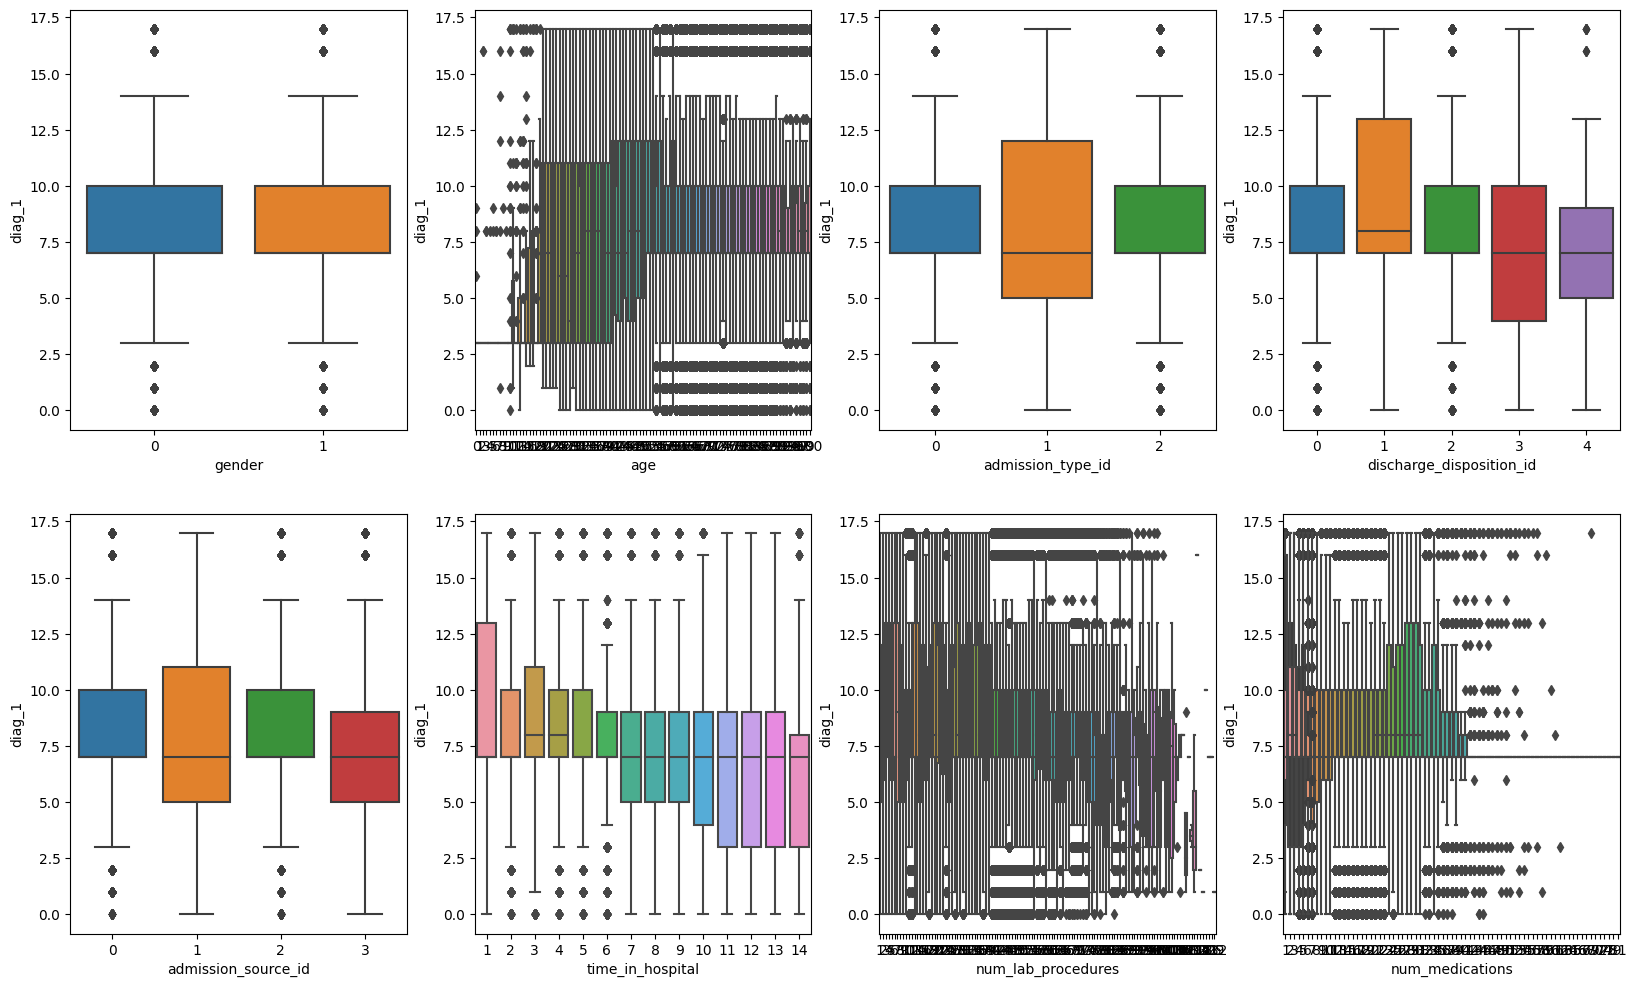

In [ ]:
plt.figure(figsize=(20, 12))#Comparing with diagnose 1
plt.subplot(2,4,1)
sns.boxplot(x = 'gender', y = 'diag_1', data = clean_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'age', y = 'diag_1', data = clean_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'admission_type_id', y = 'diag_1', data = clean_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'discharge_disposition_id', y = 'diag_1', data = clean_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'admission_source_id', y = 'diag_1', data = clean_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'time_in_hospital', y = 'diag_1', data = clean_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'num_lab_procedures', y = 'diag_1', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'num_procedures', y = 'diag_1', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'num_medications', y = 'diag_1', data = clean_df)
plt.show()



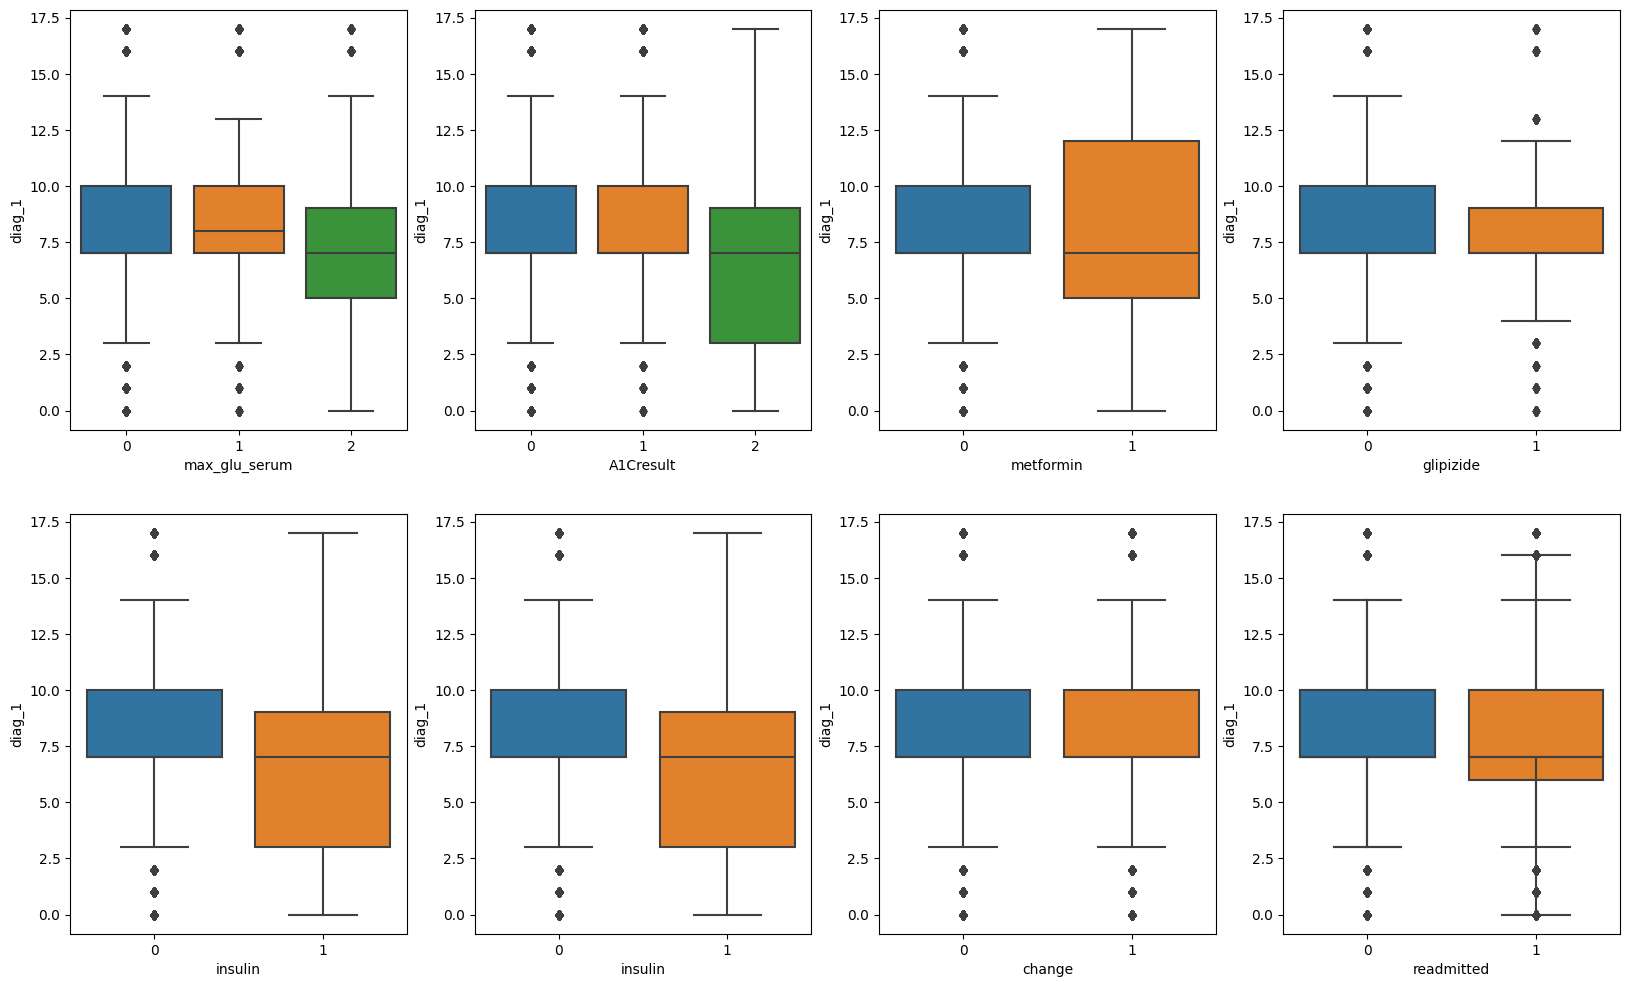

In [ ]:
plt.figure(figsize=(20, 12))#Comparing with diagnose 1
plt.subplot(2,4,1)
sns.boxplot(x = 'max_glu_serum', y = 'diag_1', data = clean_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'A1Cresult', y = 'diag_1', data = clean_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'metformin', y = 'diag_1', data = clean_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'glipizide', y = 'diag_1', data = clean_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'insulin', y = 'diag_1', data = clean_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'insulin', y = 'diag_1', data = clean_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'change', y = 'diag_1', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'diabetesMed', y = 'diag_1', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'readmitted', y = 'diag_1', data = clean_df)
plt.show()



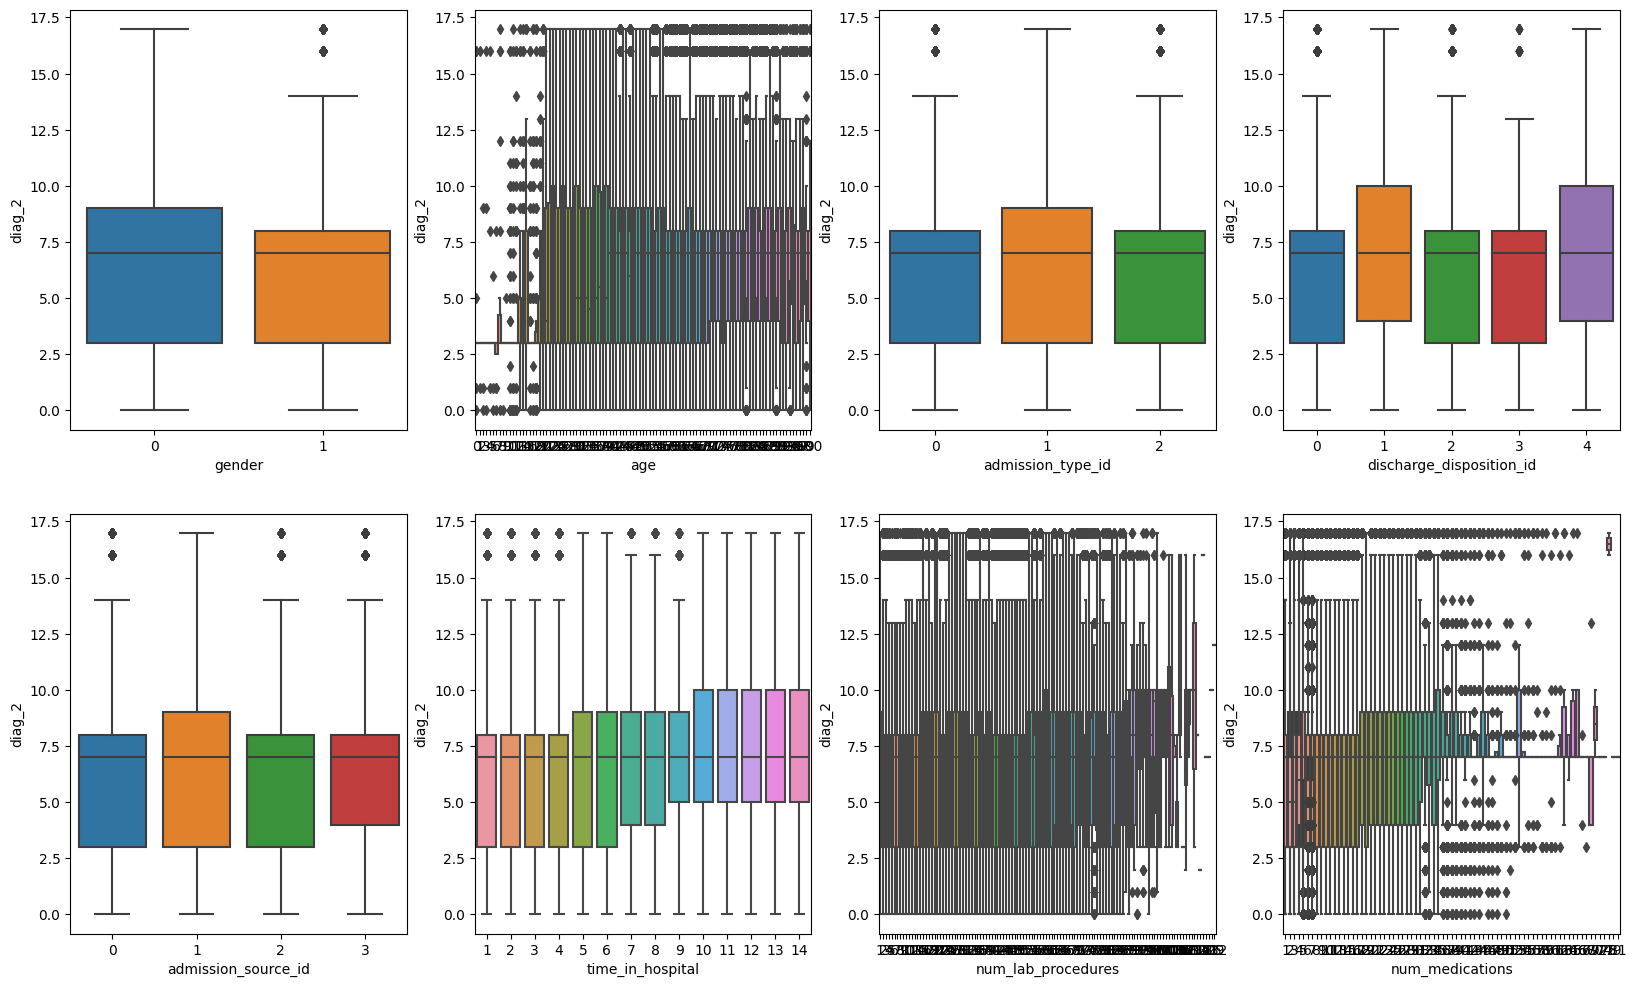

In [ ]:
plt.figure(figsize=(20, 12))#Comparing with diagnose 2
plt.subplot(2,4,1)
sns.boxplot(x = 'gender', y = 'diag_2', data = clean_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'age', y = 'diag_2', data = clean_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'admission_type_id', y = 'diag_2', data = clean_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'discharge_disposition_id', y = 'diag_2', data = clean_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'admission_source_id', y = 'diag_2', data = clean_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'time_in_hospital', y = 'diag_2', data = clean_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'num_lab_procedures', y = 'diag_2', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'num_procedures', y = 'diag_2', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'num_medications', y = 'diag_2', data = clean_df)
plt.show()



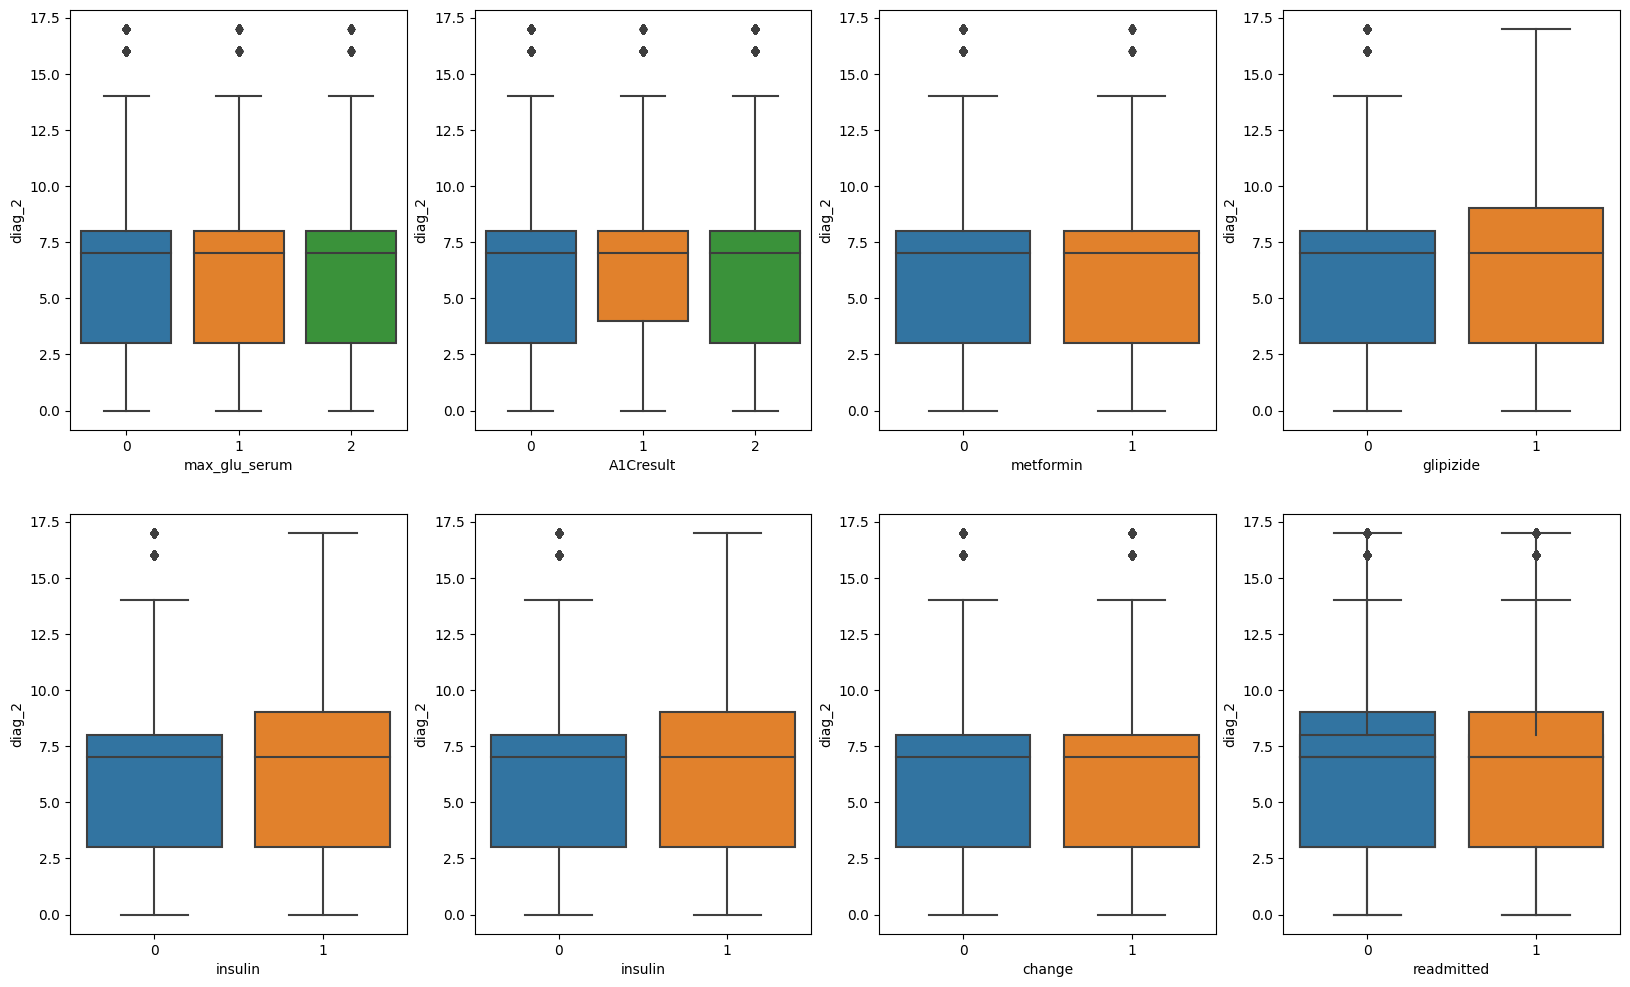

In [ ]:
plt.figure(figsize=(20, 12))#Comparing with diagnose 2
plt.subplot(2,4,1)
sns.boxplot(x = 'max_glu_serum', y = 'diag_2', data = clean_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'A1Cresult', y = 'diag_2', data = clean_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'metformin', y = 'diag_2', data = clean_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'glipizide', y = 'diag_2', data = clean_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'insulin', y = 'diag_2', data = clean_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'insulin', y = 'diag_2', data = clean_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'change', y = 'diag_2', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'diabetesMed', y = 'diag_2', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'readmitted', y = 'diag_2', data = clean_df)
plt.show()



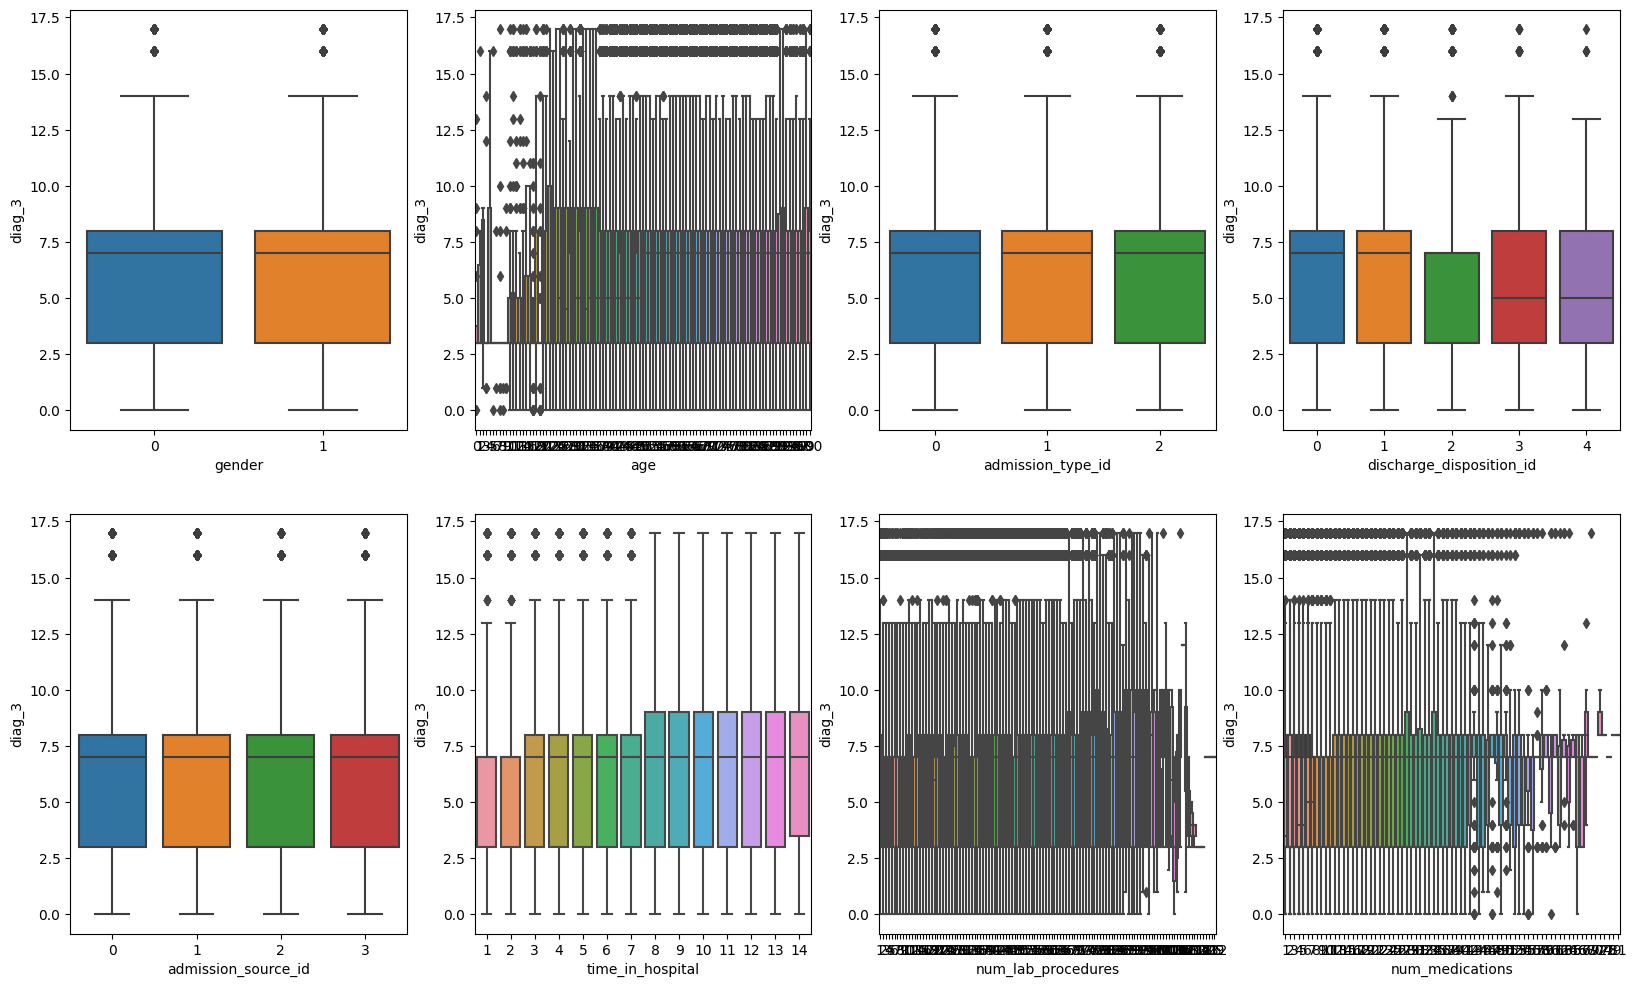

In [ ]:
plt.figure(figsize=(20, 12))#Comparing with diagnose 3
plt.subplot(2,4,1)
sns.boxplot(x = 'gender', y = 'diag_3', data = clean_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'age', y = 'diag_3', data = clean_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'admission_type_id', y = 'diag_3', data = clean_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'discharge_disposition_id', y = 'diag_3', data = clean_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'admission_source_id', y = 'diag_3', data = clean_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'time_in_hospital', y = 'diag_3', data = clean_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'num_lab_procedures', y = 'diag_3', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'num_procedures', y = 'diag_3', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'num_medications', y = 'diag_3', data = clean_df)
plt.show()



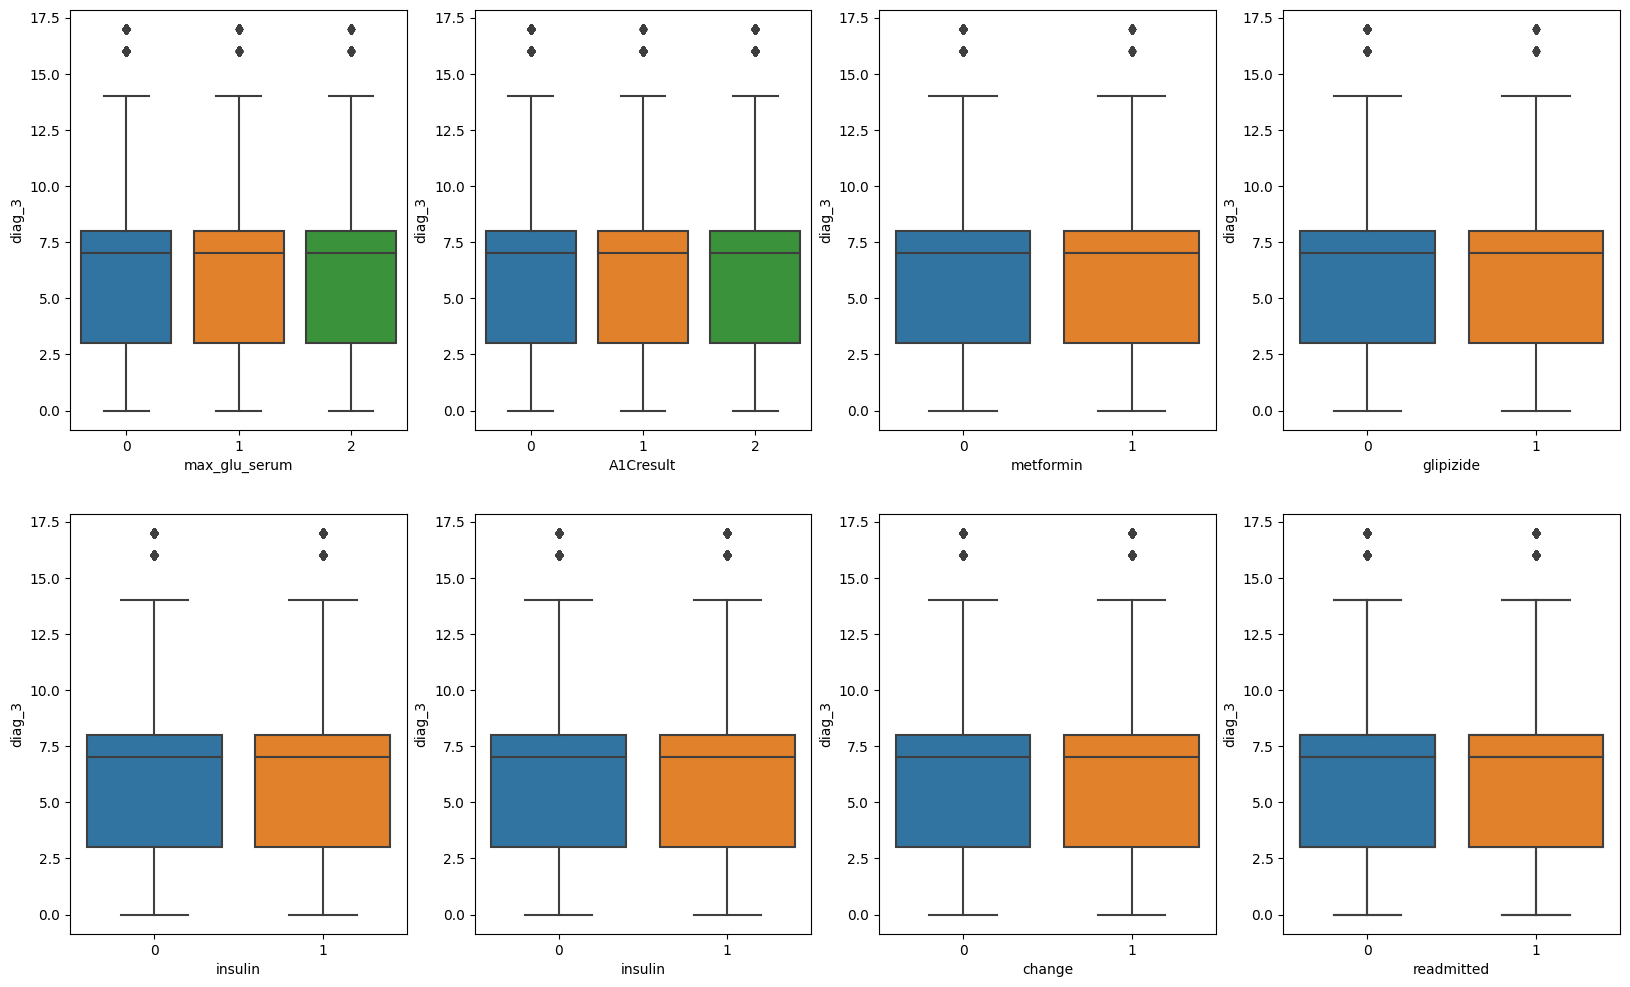

In [ ]:
plt.figure(figsize=(20, 12))#Comparing with diagnose 3
plt.subplot(2,4,1)
sns.boxplot(x = 'max_glu_serum', y = 'diag_3', data = clean_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'A1Cresult', y = 'diag_3', data = clean_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'metformin', y = 'diag_3', data = clean_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'glipizide', y = 'diag_3', data = clean_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'insulin', y = 'diag_3', data = clean_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'insulin', y = 'diag_3', data = clean_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'change', y = 'diag_3', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'diabetesMed', y = 'diag_3', data = clean_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'readmitted', y = 'diag_3', data = clean_df)
plt.show()



In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99323 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    99323 non-null  int64  
 1   age                       99323 non-null  int64  
 2   admission_type_id         99323 non-null  int64  
 3   discharge_disposition_id  99323 non-null  int64  
 4   admission_source_id       99323 non-null  int64  
 5   time_in_hospital          99323 non-null  int64  
 6   num_lab_procedures        99323 non-null  int64  
 7   num_procedures            99323 non-null  int64  
 8   num_medications           99323 non-null  int64  
 9   diag_1                    99323 non-null  float64
 10  diag_2                    99323 non-null  float64
 11  diag_3                    99323 non-null  float64
 12  number_diagnoses          99323 non-null  int64  
 13  max_glu_serum             99323 non-null  int64  
 14  A1Cre

In [ ]:
getcolumn=['diag_1','diag_2','diag_3']
aggregateData=clean_df.groupby('diag_1')[getcolumn].sum()
print(aggregateData)

          diag_1    diag_2    diag_3
diag_1                              
0.0          0.0   11173.0   10305.0
1.0       2553.0   20134.0   18240.0
2.0       6262.0   18439.0   18527.0
3.0      33906.0   83615.0   77777.0
4.0       4368.0    7315.0    7162.0
5.0      11280.0   13167.0   12739.0
6.0       7086.0    8110.0    7124.0
7.0     207186.0  209969.0  188945.0
8.0      79344.0   67939.0   62622.0
9.0      81639.0   60002.0   55888.0
10.0     49630.0   32114.0   30896.0
11.0      7546.0    5514.0    4485.0
12.0     30096.0   16782.0   15205.0
13.0     64116.0   34917.0   31671.0
14.0       700.0     444.0     319.0
16.0    121600.0   51281.0   46943.0
17.0    116450.0   50289.0   43491.0


# Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
import lightgbm as ltb
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
X = df.drop('readmitted', axis=1)
y = df.readmitted

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (69526, 22)
y_train (69526,)
X_test (29797, 22)
y_test (29797,)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
print('Training Accuracy', lr.score(X_train, y_train))

lr.fit(X_test, y_test)
print('Testing Accuracy', lr.score(X_test, y_test))

Training Accuracy 0.8852659436757472
Testing Accuracy 0.8843507735678089


In [ ]:
cvs = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='accuracy', cv=5)
print('Cross Validation Score', np.mean(cvs))

Cross Validation Score 0.8854241617046246


In [ ]:
pred = lr.predict(X_test)
predx = lr.predict(X_train)
print('Confusion Matrix',confusion_matrix(y_test, pred))
print('Classification Report',classification_report(y_test, pred))
print('Precision Score', precision_score(y_test, pred))
print('Recall Score', recall_score(y_test, pred))
print('F1 Score', f1_score(y_test, pred))
print('ROC AUC Score', roc_auc_score(y_test, pred))

Confusion Matrix [[127  18]
 [ 27 128]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.88      0.83      0.85       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Precision Score 0.8767123287671232
Recall Score 0.8258064516129032
F1 Score 0.8504983388704319
ROC AUC Score 0.8508342602892102


ROC AUC Score: 0.8508342602892102


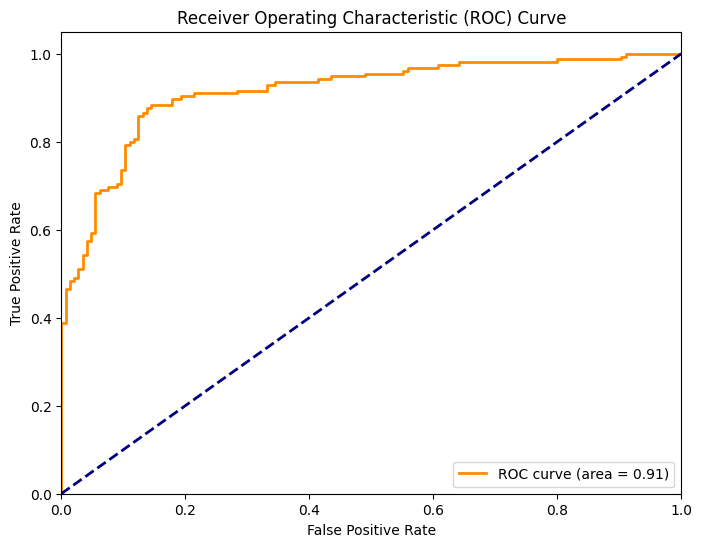

In [ ]:
lr = LogisticRegression()# Create a logistic regression classifier
lr.fit(X_train, y_train)# Fit the logistic regression model on the entire training dataset
y_scores = lr.predict_proba(X_test)[:, 1]# Calculate the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)# Compute ROC curve
roc_auc = roc_auc_score(y_test, y_scores)# Calculate ROC AUC
print('ROC AUC Score:', roc_auc_score(y_test, pred))
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=10)

dt.fit(X_train, y_train)
print('Training Accuracy', dt.score(X_train, y_train))

dt.fit(X_test, y_test)
print('Testing Accuracy', dt.score(X_test, y_test))

Training Accuracy 1.0
Testing Accuracy 1.0


In [ ]:
cvs = cross_val_score(estimator=dt, X=X_train, y=y_train, scoring='accuracy', cv=5)
print('Cross Validation Score', np.mean(cvs))

Cross Validation Score 0.7866553242651009


In [ ]:
pred = dt.predict(X_test)
predx = dt.predict(X_train)
print('Confusion Matrix',confusion_matrix(y_test, pred))
print('Classification Report',classification_report(y_test, pred))
print('Precision Score', precision_score(y_test, pred))
print('Recall Score', recall_score(y_test, pred))
print('F1 Score', f1_score(y_test, pred))
print('ROC AUC Score', roc_auc_score(y_test, pred))

Confusion Matrix [[128  17]
 [ 26 129]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.86       145
           1       0.88      0.83      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Precision Score 0.8835616438356164
Recall Score 0.832258064516129
F1 Score 0.8571428571428571
ROC AUC Score 0.8575083426028921


ROC AUC Score: 0.8575083426028921


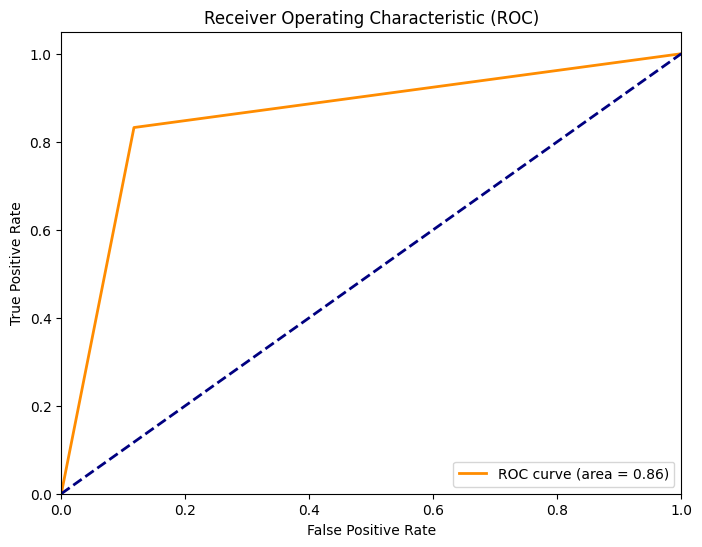

In [ ]:
dt = DecisionTreeClassifier(random_state=10)# Create a Decision Tree classifier
dt.fit(X_train, y_train)# Fit the model on the training data
y_scores = dt.predict_proba(X_test)[:, 1]# Get predicted probabilities for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)# Compute ROC curve
roc_auc = roc_auc_score(y_test, y_scores)# Calculate AUC (Area Under the ROC Curve)
# Show the ROC AUC score
print('ROC AUC Score:', roc_auc_score(y_test, pred))


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
print('Training Accuracy', rf.score(X_train, y_train))

rf.fit(X_test, y_test)
print('Testing Accuracy', rf.score(X_test, y_test))

Training Accuracy 1.0
Testing Accuracy 1.0


In [ ]:
cvs = cross_val_score(estimator=rf, X=X_train, y=y_train, scoring='accuracy', cv=5)
print('Cross Validation Score', np.mean(cvs))

Cross Validation Score 0.8957142857142857


In [ ]:
pred = rf.predict(X_test)
predx = rf.predict(X_train)
print('Confusion Matrix',confusion_matrix(y_test, pred))
print('Classification Report',classification_report(y_test, pred))
print('Precision Score', precision_score(y_test, pred))
print('Recall Score', recall_score(y_test, pred))
print('F1 Score', f1_score(y_test, pred))
print('ROC AUC Score', roc_auc_score(y_test, pred))

Confusion Matrix [[145   0]
 [  0 155]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       155

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Precision Score 1.0
Recall Score 1.0
F1 Score 1.0
ROC AUC Score 1.0


ROC AUC Score: 1.0


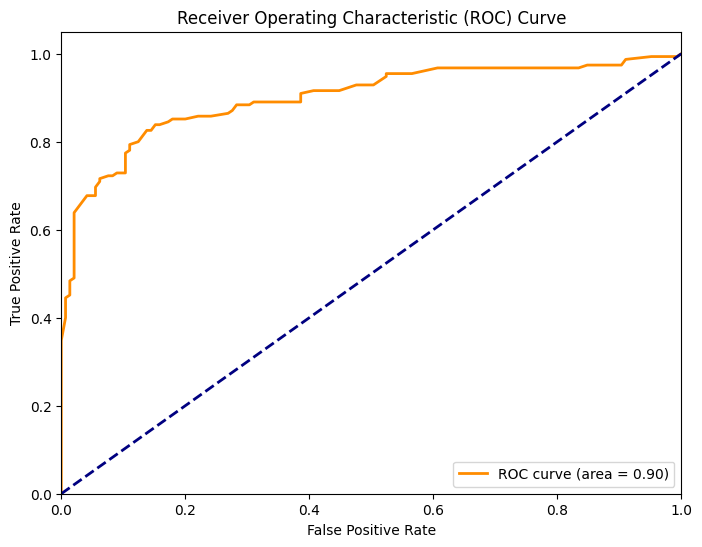

In [ ]:
y_scores = cross_val_predict(rf, X_test, y_test, cv=5, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)# Calculate AUC (Area Under the ROC Curve)
print('ROC AUC Score:', roc_auc_score(y_test, pred))
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

